# Evaluation Project 2: HR Analytics Project

# Human Resource Analytics Project is a classification based problem statement to predict number of predicted attrition cases from several indicators, it also strives to study and generate as many insights as possible. Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes. This project is concerned with answering the question, how hr analytics can help in analyzing attrition.

# Importing Data From Github repository dsrscientist/IBM_HR_Attrition_Rate_Analytics

# Introduction

# Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees. It can be voluntary as well as involuntary.

#Verbal Solution To Question 2
# Analytics has taken over human resource field. It is as famous in Human Resource as it is in other areas. HR Analytics prevent loss of employees and hence increases return on investment. Through HR Analytics, professionals can study how different features are involved in increasing as well as decreasing attrition rate. It can also build predictive models that can predict, based on an employee's present condition, how vulnerable he is to attrition. Based on these predictions, human resource can take required steps to prevent attrition.

The Insight that can be drawn with the help of data it collects, are detailed in eda sections (it is divided in two parts for thorough study of each feature). Followed by which, I have developed ensemble, bagging and boosting based classification predictive models to provide a complete HR Analytics problem solution.

# Importing Required Libraries And Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [2]:
# Observation 1
shape_of_data=data.shape
print('Number Of Rows: ',shape_of_data[0], 'Number Of Columns: ', shape_of_data[1])

Number Of Rows:  1470 Number Of Columns:  35


# Data Cleaning

In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
print('Type of storage of data ', type(data), '\nType of data series ', type(data.columns))

Type of storage of data  <class 'pandas.core.frame.DataFrame'> 
Type of data series  <class 'pandas.core.indexes.base.Index'>


In [5]:
data.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [6]:
data.isna().values.any()

False

In [7]:
data.isnull().values.sum()

0

In [8]:
data.dtypes, len(data.dtypes)

(Age                          int64
 Attrition                   object
 BusinessTravel              object
 DailyRate                    int64
 Department                  object
 DistanceFromHome             int64
 Education                    int64
 EducationField              object
 EmployeeCount                int64
 EmployeeNumber               int64
 EnvironmentSatisfaction      int64
 Gender                      object
 HourlyRate                   int64
 JobInvolvement               int64
 JobLevel                     int64
 JobRole                     object
 JobSatisfaction              int64
 MaritalStatus               object
 MonthlyIncome                int64
 MonthlyRate                  int64
 NumCompaniesWorked           int64
 Over18                      object
 OverTime                    object
 PercentSalaryHike            int64
 PerformanceRating            int64
 RelationshipSatisfaction     int64
 StandardHours                int64
 StockOptionLevel           

# Tabulated Conclusion Of Data Cleaning

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Verbal Translation Of Conclusion Of Above Data Cleaning Process

# Conclusion:
1. The dataset has no missing values, therefore imputation and filling data are not required.
2. The whole dataset is of 1470*35, hence, chances of overfitting, that is, model getting trained more than essential are high so we will go through the data thoroughly and try to draw anomalies and code some derived features, that can be of help in making predictions.
3. There are 26 continuous columns and 9 categorical columns, hence, encoding is not required.

# Exploratory Data Analysis

In [10]:
import numpy as np
import cufflinks as cf
cf.set_config_file(offline=True)
data[data.select_dtypes(include=np.number).columns].interpolate().apply(np.log).cumsum().iplot(title='Log Transformed View Of Dataset')

# Observations:                                                                                                         
1. I have transformed the data into lognormal for better visual understanding of data.                                     
2. Max of Cumaltive Sum for Performance Rating and Work Life Balance are overlapping, there is just -1 difference between the two values initially which sums up to only -248.40 over 1470 data points.
3. The second most prominent value for good performance is Education with Max of Cumaltive Sum 1452.87 against 1679.98  performance rating.                             
4. The most divergent to Performance Rating are Monthly Rate And Employee Count.

In [11]:
log_transform=data[['PerformanceRating', 'WorkLifeBalance']].interpolate().apply(np.log).cumsum()
log_transform['Difference']=log_transform['WorkLifeBalance']-log_transform['PerformanceRating']
log_transform

PerformanceRating  WorkLifeBalance  Difference
0              1.098612         0.000000   -1.098612
1              2.484907         1.098612   -1.386294
2              3.583519         2.197225   -1.386294
3              4.682131         3.295837   -1.386294
4              5.780744         4.394449   -1.386294
...                 ...              ...         ...
1465        1675.294081      1427.329775 -247.964306
1466        1676.392694      1428.428387 -247.964306
1467        1677.778988      1429.527000 -248.251989
1468        1678.877600      1430.220147 -248.657454
1469        1679.976213      1431.606441 -248.369772

[1470 rows x 3 columns]

In [12]:
import plotly.figure_factory as ff
fig =  ff.create_table(log_transform)
fig.update_layout(
    autosize=True,
    width=700,
)
fig.show()

# The above table shows each data point comparison of Work Life Balance And Performance Rating.

Pattern Discovered:

1. Performance Rating has outperformed Work Life Balance.

Q&A answered:
1. Highest Performace Rating: 4; 

2. Highest cumulative Performance Rating: 1679.97;

3. Mode of Performance Rating: 3;

4. Median of Performance Rating: 3;

5. Mean of Performance Rating: 3.15 ~ 3;

6. Since, mean=median=mode, it seems a normal distibution.

7. Highest Work Life Balance: 4;

8. Highest Cumulative Work Life Balance: 1431.6;

9. Mode of Work Life Balance: 3;

10. Median of Work Life Balance: 3;

11. Mean of Work Life Balance: 2.8 ~ 3;

12. Since, mean=median=mode, it seems a normal distibution.

Anomalies Detected:

1. At -1.10, 0 had the highest Difference and was 99.56% higher than 1468, which had the lowest Difference at -248.66.

2. Difference and total PerformanceRating are negatively correlated with each other.

3. 1468 accounted for 0.13% of Difference.

4. Across all 1,470 Column1, Difference ranged from -248.66 to -1.10, PerformanceRating ranged from 1.10 to 1,679.98, and WorkLifeBalance ranged from 0 to 1,431.61.

# Observations In Tabulated Format For Work Life Balance And Performance Rating

In [12]:
describe=log_transform.describe()
dict1={'PerformanceRating':[describe.iloc[6,0]-describe.iloc[5,0]], 'WorkLifeBalance':[describe.iloc[6,1]-describe.iloc[5,1]], 'Difference':[describe.iloc[6,2]-describe.iloc[5,2]], 'Difference':[describe.iloc[6,2]-describe.iloc[5,2]]} 
describe1=pd.concat([describe, pd.DataFrame(dict1, index=['IQR'])])
dict1

{'PerformanceRating': [417.7775461178537],
 'WorkLifeBalance': [359.0291463006413],
 'Difference': [59.18226661804863]}

In [13]:
describe1

PerformanceRating  WorkLifeBalance   Difference
count        1470.000000      1470.000000  1470.000000
mean          841.469933       715.159108  -126.310825
std           484.106746       413.874806    70.271108
min             1.098612         0.000000  -248.657454
25%           422.687946       354.089301  -186.529312
50%           842.263505       714.482593  -127.780912
75%          1260.041051      1073.511740   -68.598645
max          1679.976213      1431.606441    -1.098612
IQR           417.777546       359.029146    59.182267

In [14]:
dict2={'PerformanceRating':[describe.iloc[7,0]-describe.iloc[3,0]], 'WorkLifeBalance':[describe.iloc[7,1]-describe.iloc[3,1]], 'Difference':[describe.iloc[7,2]-describe.iloc[3,2]], 'Difference':[describe.iloc[7,2]-describe.iloc[3,2]]} 
describe11=pd.concat([describe1, pd.DataFrame(dict2, index=['Range'])])
dict2

{'PerformanceRating': [1678.8776004275935],
 'WorkLifeBalance': [1431.6064411446002],
 'Difference': [247.55884135544494]}

In [15]:
dict3=pd.DataFrame(data=log_transform.skew().to_list(), index=log_transform.columns.to_list(), columns=['Skewness'])
dict3=dict3.T
dict4=pd.DataFrame(data=log_transform.kurtosis().to_list(), index=log_transform.columns.to_list(), columns=['Kurtosis'])
dict4=dict4.T
dict3, dict4

(          PerformanceRating  WorkLifeBalance  Difference
 Skewness          -0.001515         0.002479    0.027062,
           PerformanceRating  WorkLifeBalance  Difference
 Kurtosis          -1.196615        -1.205881   -1.138419)

In [16]:
describe3=pd.concat([describe11, dict3, dict4])

# Resultant Observation Table

In [17]:
describe3

PerformanceRating  WorkLifeBalance   Difference
count           1470.000000      1470.000000  1470.000000
mean             841.469933       715.159108  -126.310825
std              484.106746       413.874806    70.271108
min                1.098612         0.000000  -248.657454
25%              422.687946       354.089301  -186.529312
50%              842.263505       714.482593  -127.780912
75%             1260.041051      1073.511740   -68.598645
max             1679.976213      1431.606441    -1.098612
IQR              417.777546       359.029146    59.182267
Range           1678.877600      1431.606441   247.558841
Skewness          -0.001515         0.002479     0.027062
Kurtosis          -1.196615        -1.205881    -1.138419

In [18]:
from plotly.figure_factory import create_table
table =  create_table(describe3, index=True)
table.show()

# Mathematical Notation Of Above Table

# Mathematical Notation:
1. Mean = sum of values/count of values                                                                                     
2. std = sqrt(((value - mean of distribution)**2 / number of values ))                                                                                        
3. 3 quartile are measures of variance, calculated to spot the placeholder value, it returns index of the produced value.
Step 1: sort the dataset                                                                                                   
Step2:                                                                                                                     
i) Lower Quartile (Q1: 25% distribution) = ((number of values+1)/4)th Term                                                 
ii) Middle Quartile (Q2: 50% distribution) = ((number of values +1)/2)th Term                                               
Also, know as median (central value).                                                                                       
iii) Upper Quartile (Q3: 75% distribution) = ¾(number of values + 1)th Term                                                 
iv) IQR = Upper Quartile - Lowe Quartile                                                                                   
4. Range = Maximum Value - Minimum Value                                                                                   
5. Skewness = (sumation(value - mean of distribution)**3)/((number of values - 1) * std**3)                                 
6. Kurtosis = number of values * ((sumation(value - mean of distribution)**4) / std**4)

# Verbal Translation Of Above Table

# Performance Rating = (Negative Observed Performance / Normal Performance) * 100; As per academic theories there remain positive relation between employee well being and employee performance.
1. It can be observed that there has been constant difference between employee well being and employee performance of -126.31.                                                                              
2. Performance Rating has been at 841.47.                                                                                                                                                                                                           
3. Maximum of performance rating: Work Life Balance has been 1679.976213:1431.606441..                                                         
4. Median of Performance Rating is 118% of Performance Work Life Balance (842.263505/714.482593)
5. Kutosis for all the features is less than 3, hence, indicating platykurtic curve.

# Logistic Visualization Of Performance Rating And Work Life Balance

In [19]:
import numpy as np
data[['WorkLifeBalance', 'PerformanceRating']].interpolate().apply(np.log).cumsum().iplot(title='Log Transformed Cumulative Performance Analysis By WorkLifeBalance On PerformanceRating')

# Observations:                                                                                                        
1. I have transformed the data into lognormal for better visual understanding of data.                                     
2. The coordinates for each line is (index, value)
3. Until index 33, both the axes are overlapping. Divergence starts from index 34 and the difference keeps increasing thereon.
4. The max of cumulative sum of difference of two axes is -248.369772 (1431.606441-1679.976213)

# Count Plots Of Categorical Values

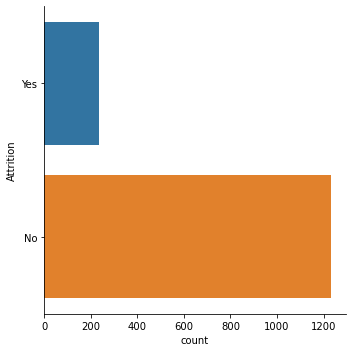

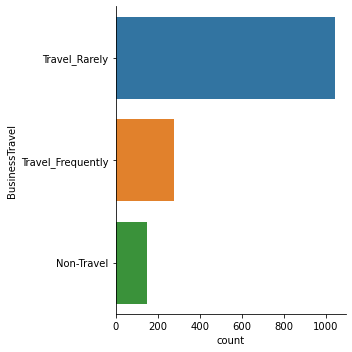

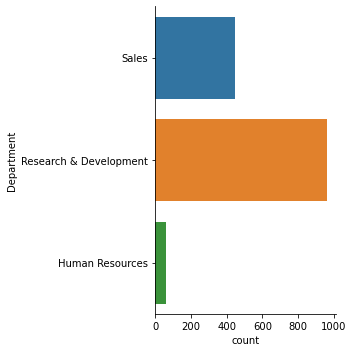

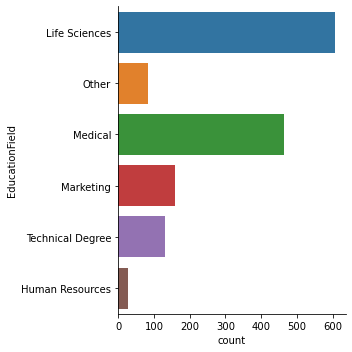

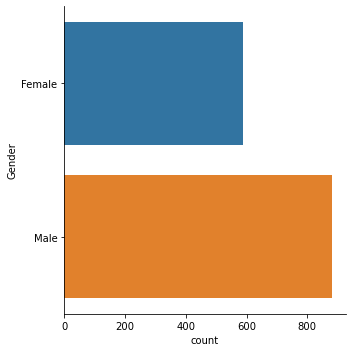

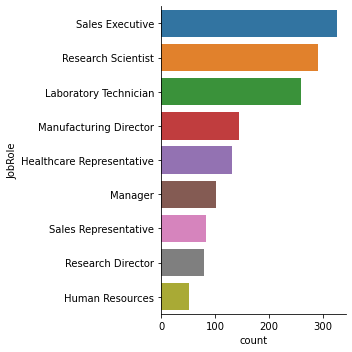

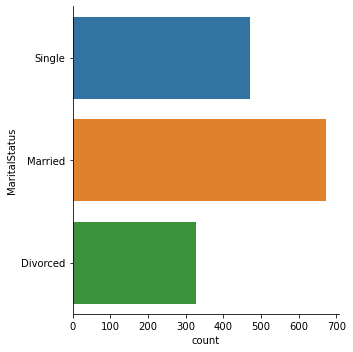

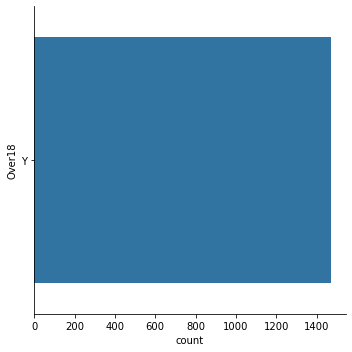

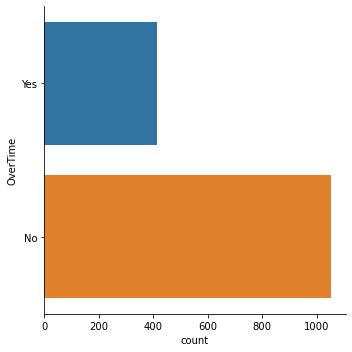

In [21]:
for x in data.select_dtypes(object).columns:
    sns.catplot(y=x, kind='count', data=data)

# Tabulated Analysis Of Above Countplots

In [20]:
object_description=data.select_dtypes(object).describe()
object_description=object_description.rename(index={'count':'count of values', 'unique':'unique values', 'top':'most frequent value', 'freq':'frequency of most frequent value'})
dict1=object_description.iloc[0,:]-object_description.iloc[3,:]
object_description1=pd.concat([object_description, pd.DataFrame(dict1).T])
object_description1=object_description1.rename(index={0:'count of remaining values'})
object_description1

Attrition BusinessTravel  \
count of values                       1470           1470   
unique values                            2              3   
most frequent value                     No  Travel_Rarely   
frequency of most frequent value      1233           1043   
count of remaining values              237            427   

                                              Department EducationField  \
count of values                                     1470           1470   
unique values                                          3              6   
most frequent value               Research & Development  Life Sciences   
frequency of most frequent value                     961            606   
count of remaining values                            509            864   

                                 Gender          JobRole MaritalStatus Over18  \
count of values                    1470             1470          1470   1470   
unique values                         2                9             3      1   
most frequent value                Male  Sales Executive       Married      Y   
frequency of most frequent value    882              326           673   1470   
count of remaining values           588             1144           797      0   

                                 OverTime  
count of values                      1470  
unique values                           2  
most frequent value                    No  
frequency of most frequent value     1054  
count of remaining values             416

# Verbal Translation Of Above Table

# Unique Values Of All Columns other than Attrition, over18 and overtime

In [21]:
data['BusinessTravel'].unique(), data['Department'].unique(), data['EducationField'].unique(), data['Gender'].unique(), data['MaritalStatus'].unique()

(array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object),
 array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 array(['Life Sciences', 'Other', 'Medical', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Single', 'Married', 'Divorced'], dtype=object))

1. There are 9 object columns, of which 3 are spread across yes and no:

i. Attrition has 1233 No Values and 237 Yes Values (237 employess are prone to attrition).

ii. Over18 has all 1470 Yes Values (entire workforce is above 18).

iii. Overtime has 1054 No values and 416 Yes values (less than half of the workforce does overtime).

2. Apart from these, remaining 6 columns have more than 2 unique values and are arranged in cell above:

Rows 3, 4 and 5 explain the most frequent value and its count and data portion occupied by other unique values.

For example, there are 882 Male and 588 Female, etcetra as displayed above.

# Dataset Visualization                                                                                                     

# Head View

In [22]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# The above table represents first five rows of original dataset

# Sample View

In [23]:
data.sample()

Age Attrition BusinessTravel  DailyRate              Department  \
1045   40        No  Travel_Rarely        896  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1045                 2          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1045            1474  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1045                 1                  8                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1045               4               3                  1   

      YearsSinceLastPromotion  YearsWithCurrManager  
1045                        1                     2  

[1 rows x 35 columns]

# The above table represents a random row as sample row from the dataset

# Tail View

In [24]:
data.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

# The above table represents last five rows of the dataframe.

# Feature Engineering

# Encoding

# Attrition encoding : yes is converted to 1 and No to 0

In [25]:
data['Attrition']=np.where(data['Attrition']=='Yes', 1, 0)
data['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

# Names of all other object columns (8 such columns)

In [26]:
data.select_dtypes(object).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

# Encoding Of All Other Object Columns With Ordinal Encoder (8 such columns)

In [27]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data.select_dtypes(include = [object]))
encoded_data=pd.DataFrame(data=result, columns=data.select_dtypes(include = [object]).columns+'_'+'encoded')
encoded_data

BusinessTravel_encoded  Department_encoded  EducationField_encoded  \
0                        2.0                 2.0                     1.0   
1                        1.0                 1.0                     1.0   
2                        2.0                 1.0                     4.0   
3                        1.0                 1.0                     1.0   
4                        2.0                 1.0                     3.0   
...                      ...                 ...                     ...   
1465                     1.0                 1.0                     3.0   
1466                     2.0                 1.0                     3.0   
1467                     2.0                 1.0                     1.0   
1468                     1.0                 2.0                     3.0   
1469                     2.0                 1.0                     3.0   

      Gender_encoded  JobRole_encoded  MaritalStatus_encoded  Over18_encoded  \
0                0.0              7.0                    2.0             0.0   
1                1.0              6.0                    1.0             0.0   
2                1.0              2.0                    2.0             0.0   
3                0.0              6.0                    1.0             0.0   
4                1.0              2.0                    1.0             0.0   
...              ...              ...                    ...             ...   
1465             1.0              2.0                    1.0             0.0   
1466             1.0              0.0                    1.0             0.0   
1467             1.0              4.0                    1.0             0.0   
1468             1.0              7.0                    1.0             0.0   
1469             1.0              2.0                    1.0             0.0   

      OverTime_encoded  
0                  1.0  
1                  0.0  
2                  1.0  
3                  1.0  
4                  0.0  
...                ...  
1465               0.0  
1466               0.0  
1467               1.0  
1468               0.0  
1469               0.0  

[1470 rows x 8 columns]

# Comparison Of Encoded Column And Original Column ('Business Travel')

In [28]:
encoded_data['BusinessTravel_encoded'].unique()

array([2., 1., 0.])

In [29]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

# Conclusion
Travel Rarely is encoded to 2, Travel frequently to 1 and Non Travel to 0.

# Concatenating Encoded Data With Original Data

In [30]:
data=pd.concat([data, encoded_data], axis=1, ignore_index=False)
data=data.fillna(0)
data=data.drop(data.select_dtypes(object).columns, axis=1)
data.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               2                        3          61               2  ...   
2               4                        4          92               2  ...   
3               5                        4          56               3  ...   
4               7                        1          40               3  ...   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_encoded  \
0                        0                     5                     2.0   
1                        1                     7                     1.0   
2                        0                     0                     2.0   
3                        3                     0                     1.0   
4                        2                     2                     2.0   

   Department_encoded  EducationField_encoded  Gender_encoded  \
0                 2.0                     1.0             0.0   
1                 1.0                     1.0             1.0   
2                 1.0                     4.0             1.0   
3                 1.0                     1.0             0.0   
4                 1.0                     3.0             1.0   

   JobRole_encoded  MaritalStatus_encoded  Over18_encoded  OverTime_encoded  
0              7.0                    2.0             0.0               1.0  
1              6.0                    1.0             0.0               0.0  
2              2.0                    2.0             0.0               1.0  
3              6.0                    1.0             0.0               1.0  
4              2.0                    1.0             0.0               0.0  

[5 rows x 35 columns]

# Saving a copy of dataframe as final_dataframe that will be used further and data will be kept as storage of encoded and raw data.

In [31]:
final_dataframe=data.copy()

In [32]:
final_dataframe.isna().values.any()

False

In [33]:
final_dataframe=final_dataframe.fillna(0)
final_dataframe.isna().values.any()

False

In [34]:
final_dataframe[np.isinf(final_dataframe)] = 0

# There are no null and missing values in final dataframe.

# EDA Part 1

In [35]:
final_dataframe[:10]

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   
5   32          0       1005                 2          2              1   
6   59          0       1324                 3          3              1   
7   30          0       1358                24          1              1   
8   38          0        216                23          3              1   
9   36          0       1299                27          3              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               2                        3          61               2  ...   
2               4                        4          92               2  ...   
3               5                        4          56               3  ...   
4               7                        1          40               3  ...   
5               8                        4          79               3  ...   
6              10                        3          81               4  ...   
7              11                        4          67               3  ...   
8              12                        4          44               2  ...   
9              13                        3          94               3  ...   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_encoded  \
0                        0                     5                     2.0   
1                        1                     7                     1.0   
2                        0                     0                     2.0   
3                        3                     0                     1.0   
4                        2                     2                     2.0   
5                        3                     6                     1.0   
6                        0                     0                     2.0   
7                        0                     0                     2.0   
8                        1                     8                     1.0   
9                        7                     7                     2.0   

   Department_encoded  EducationField_encoded  Gender_encoded  \
0                 2.0                     1.0             0.0   
1                 1.0                     1.0             1.0   
2                 1.0                     4.0             1.0   
3                 1.0                     1.0             0.0   
4                 1.0                     3.0             1.0   
5                 1.0                     1.0             1.0   
6                 1.0                     3.0             0.0   
7                 1.0                     1.0             1.0   
8                 1.0                     1.0             1.0   
9                 1.0                     3.0             1.0   

   JobRole_encoded  MaritalStatus_encoded  Over18_encoded  OverTime_encoded  
0              7.0                    2.0             0.0               1.0  
1              6.0                    1.0             0.0               0.0  
2              2.0                    2.0             0.0               1.0  
3              6.0                    1.0             0.0               1.0  
4              2.0                    1.0             0.0               0.0  
5              2.0                    2.0             0.0               0.0  
6              2.0                    1.0             0.0               1.0  
7              2.0                    0.0             0.0               0.0  
8              4.0                    2.0

# The above table represents first 10 rows from final dataframe.

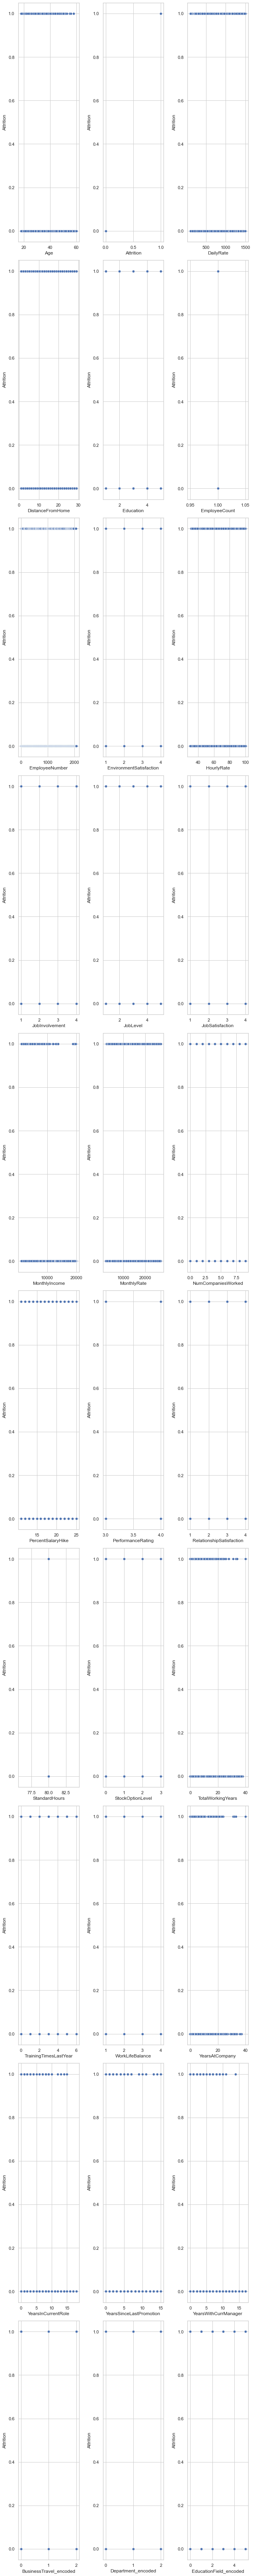

In [36]:
colist=final_dataframe.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(len(colist)):
    try:
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        sns.scatterplot(colist[x], y='Attrition', data=final_dataframe)
        plt.tight_layout()
    except ValueError:
        continue

# It can be visualized from above scatter plots against outcome vector that distribution is mostly evenly distributed for most of the columns. For example, 
i. Age

ii. Daily Rate

iii. Distance From Home

iv. Employee Number

v. Environment Satisfaction

vi. Horly Rate

vii. Job Involvement

viii. Job Level

ix. Job Satisfaction

x. Monthly Rate

xi. Number Of Companies Worked

Likewise, all the columns.

For example, 

1=Yes and 0=No

i. in years in current role, coordinate are evenly distributed between Attrition 0 and 1, except that 0 has a few extra points between 10 to 15 and beyond 15, depicting that people who have stayed in current role for more than 10 years have higher chance of attrition.

ii. people beyond 5 years since last promotion have higher chance of attrition.

iii. chances of attrition are high for total working years beyond 20.

iv. chances of attrition are high for total working years in current company beyond 20 years.

v. chance of attrition are high for people who are working with the current manager more than 10 years.

vi. Education field has equal number of yes and no.

vii. Chances of attrition are high for monthly income beyond 10000.

# Value Count Of employees vulnerable to attrition and not.

In [40]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

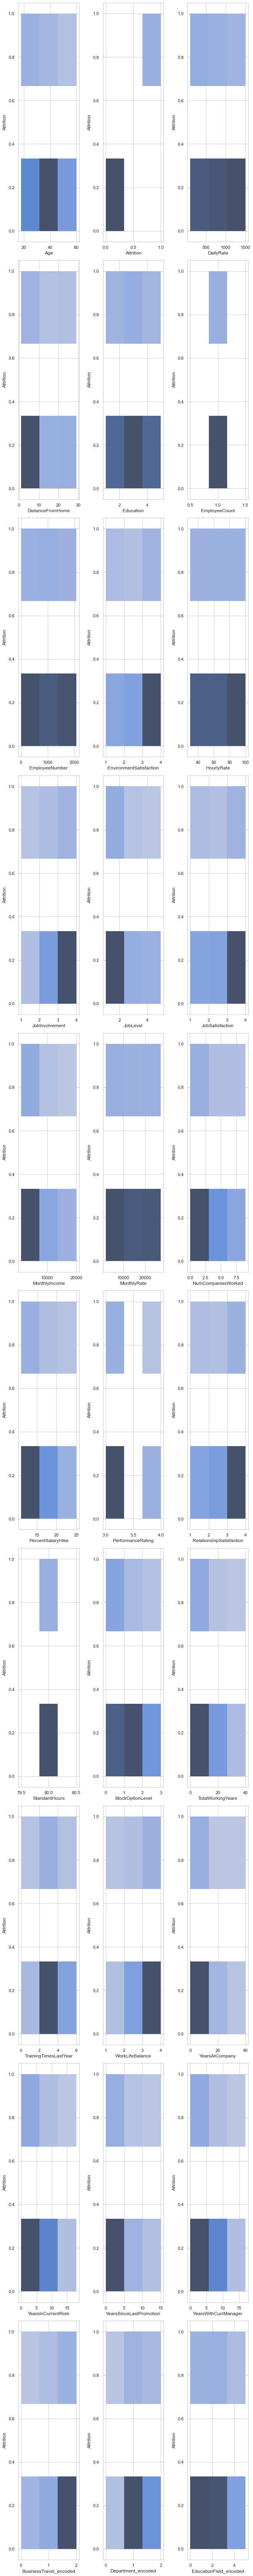

In [41]:
colist=final_dataframe.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    try:
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        sns.histplot(x=colist[x], y='Attrition', data=final_dataframe, bins=3)
        plt.tight_layout()
    except ValueError:
        continue

# The above histograms show frequency distribution of features agains label. It is divided into 3 bins. Only BusinessTravel shows left skewness. Many datapoints, WorkLifeBalance, JobInvolvement, Monthly Rate, etcetera seem to be close to normal with skewness threshold within +/-0.65.
3 columns have 0 skewness (as desired in normal distribution):

i. Employee Count,

ii. Standard Hours.

iii. Over 18 encoded.

In [44]:
final_dataframe.corr()

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EmployeeCount                  NaN        NaN        NaN               NaN   
EmployeeNumber           -0.010145  -0.010577  -0.050990          0.032916   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
MonthlyIncome             0.497855  -0.159840   0.007707         -0.017014   
MonthlyRate               0.028051   0.015170  -0.032182          0.027473   
NumCompaniesWorked        0.299635   0.043494   0.038153         -0.029251   
PercentSalaryHike         0.003634  -0.013478   0.022704          0.040235   
PerformanceRating         0.001904   0.002889   0.000473          0.027110   
RelationshipSatisfaction  0.053535  -0.045872   0.007846          0.006557   
StandardHours                  NaN        NaN        NaN               NaN   
StockOptionLevel          0.037510  -0.137145   0.042143          0.044872   
TotalWorkingYears         0.680381  -0.171063   0.014515          0.004628   
TrainingTimesLastYear    -0.019621  -0.059478   0.002453         -0.036942   
WorkLifeBalance          -0.021490  -0.063939  -0.037848         -0.026556   
YearsAtCompany            0.311309  -0.134392  -0.034055          0.009508   
YearsInCurrentRole        0.212901  -0.160545   0.009932          0.018845   
YearsSinceLastPromotion   0.216513  -0.033019  -0.033229          0.010029   
YearsWithCurrManager      0.202089  -0.156199  -0.026363          0.014406   
BusinessTravel_encoded    0.024751   0.000074  -0.004086         -0.024469   
Department_encoded       -0.031882   0.063991   0.007109          0.017225   
EducationField_encoded   -0.040873   0.026846   0.037709          0.002013   
Gender_encoded           -0.036311   0.029453  -0.011716         -0.001851   
JobRole_encoded          -0.122427   0.067151  -0.009472         -0.001015   
MaritalStatus_encoded    -0.095029   0.162070  -0.069586         -0.014437   
Over18_encoded                 NaN        NaN        NaN               NaN   
OverTime_encoded          0.028062   0.246118   0.009135          0.025514   

                          Education  EmployeeCount  EmployeeNumber  \
Age                        0.208034            NaN       -0.010145   
Attrition                 -0.031373            NaN       -0.010577   
DailyRate                 -0.016806            NaN       -0.050990   
DistanceFromHome           0.021042            NaN        0.032916   
Education                  1.000000            NaN        0.042070   
EmployeeCount                   NaN            NaN             NaN   
EmployeeNumber             0.042070            NaN        1.000000   
EnvironmentSatisfaction   -0.027128            NaN        0.017621   
HourlyRate                 0.016775            NaN        0.035179   
JobInvolvement             0.042438            NaN       -0.006888   
JobLevel                   0.101589            NaN       -0.018519   
JobSatisfaction           -0.011296            NaN       -0.046247   
MonthlyIncome              0.094961            NaN       -0.014829   
MonthlyRate               -0.026084            NaN        0.012648   
NumCompaniesWorked         0.126317            NaN       -0.001251   
PercentSalaryHike         -0.011111            NaN       -0.012944   
PerformanceRating         -0.024

# The above table represents correlation among dataset. There seems some multicollinearity due to presence of Job Level and Age;  Marital Status Encoded and Stock Option Level; that show strong correlation between each other. Other  than these columns there seems modest collinearity among features. We will do further eda befor arriving at a conclusion to delete these columns.

# Graphical Representation Of Correlation Of Features With Label

In [45]:
pd.DataFrame((final_dataframe.corr()['Attrition'])).iplot(title='Correlation Of Variables With Label')

# The above iplot represents correlation of features with label. Correlation of features with labe is of high relevance. The stronger the relationship of label with axis, the more accurate the prediction. In the above line graph:

1. Highest correlation with labe is observed to be 16.21%, that is shared with marital status encoded. Minimum correlation is 0.3%, shared with Performance Rating.

2. Weak Positive To Strong Positive Relationship Is Found With Following Features:

i. BusinessTravel_encoded	7.377694602219632e-05 

ii. PerformanceRating	0.0028887517110809

iii.MonthlyRate	0.015170212530471473

iv. EducationField_encoded	0.026845545711446116

v.  Gender_encoded	0.029453253175141608

vi. NumCompaniesWorked	0.04349373905781363

vii.Department_encoded	0.06399059633809044

viii.JobRole_encoded	0.0671514950495707 

ix. DistanceFromHome	0.07792358295570369

x.  MaritalStatus_encoded	0.1620702346570145

xi. OverTime_encoded	0.24611799424580436

3. Weak Negative To Strong Negative Relationship Is Found With Following Features:

i.  TotalWorkingYears	-0.17106324613622612

ii. JobLevel	-0.16910475093102761

iii.YearsInCurrentRole	-0.16054500426770077

iv. MonthlyIncome	-0.15983958238498852

v.  Age	-0.15920500686577962

vi. YearsWithCurrManager	-0.1561993159016288

vii.StockOptionLevel	-0.13714491893332562

viii.YearsAtCompany	-0.13439221398997708

ix. JobInvolvement	-0.13001595678605374

x.  JobSatisfaction	-0.10348112606902123

xi. EnvironmentSatisfaction	-0.10336897833793603

xii.WorkLifeBalance	-0.06393904721740885

xiii. TrainingTimesLastYear	-0.05947779855642057

xiv.DailyRate	-0.05665199186762936

xv. RelationshipSatisfaction	-0.0458722788811267

xvi.YearsSinceLastPromotion	-0.033018775142584306

xvii.Education	-0.031372819640049315 

xviii. PercentSalaryHike	-0.01347820205743911 

xix.EmployeeNumber	-0.010577242759242786

xx. HourlyRate	-0.006845549572139952


4. Correlation Of Label with itself is of no relevance

5. No Correlqtion is found with:

i. EmployeeCount

ii. Standard Hours

iii. Over 18 Encoded

# Mathematical Notation:
Correlation (X, Y) = (Covariance Of X and Covariance Of Y)/(Std Of X and Std Of Y)

# Correlation Heatmaps Of Individual Datasets

# Correlation Heatmap Of Original Dataset for 26 columns

<AxesSubplot:>

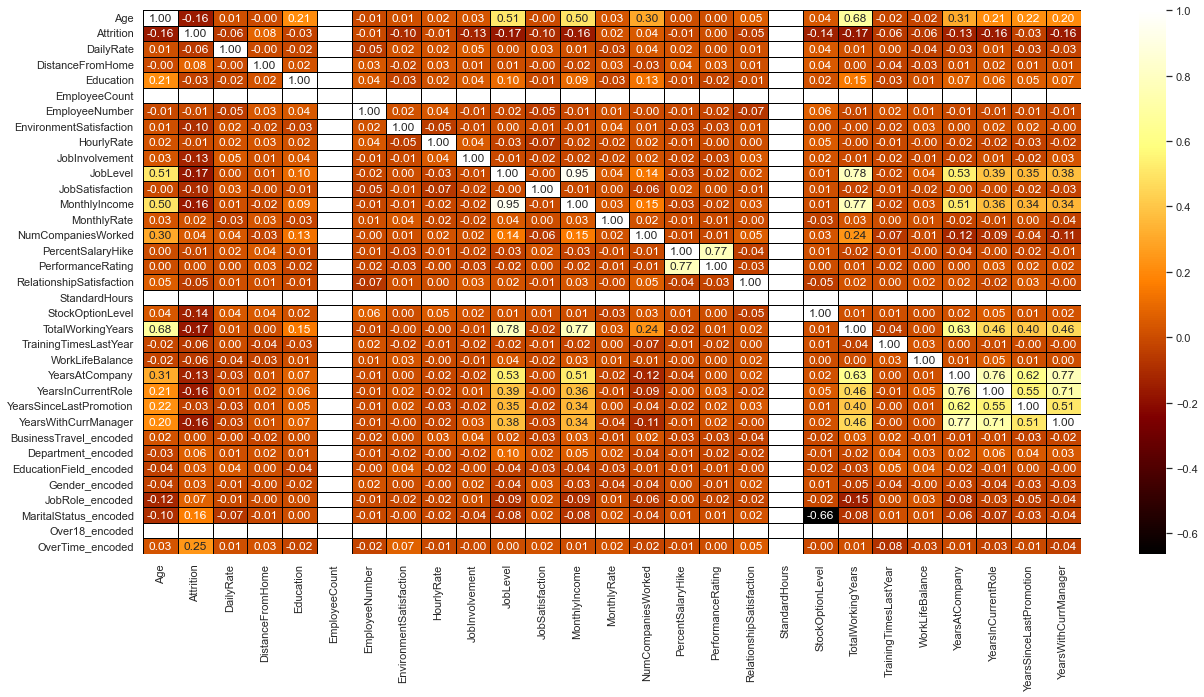

In [49]:
plt.figure(figsize=(21,10))
sns.heatmap(data.corr().iloc[:,:27], annot=True, linewidths=0.5, linecolor='black', fmt='.2f', cmap='afmhot')

# Verbal Translation Of Above Graph:
1. Label has moderate negative relationship with 3 features:

i. Distance From Home

ii. Employee Number

iii. Job Satisfaction

iv. Training Times Last Year

v. Work Life Balance

2. Label has strong relationship with these features in this heatmap:

i. Job Level

ii. Monthly Income

iii. Total Working Years

3. Strong Multicollinearity is detected among 5 features:

i. Total Working Years

ii. Years At Company

iii. Years In Current Role

iv. Years Since Last Promotion

v. Years With Current Manager

4. Multicollinearity seems to be moderate among all other data points.

# Correlation Heatmap Of Original Dataset Frm 27th Columns

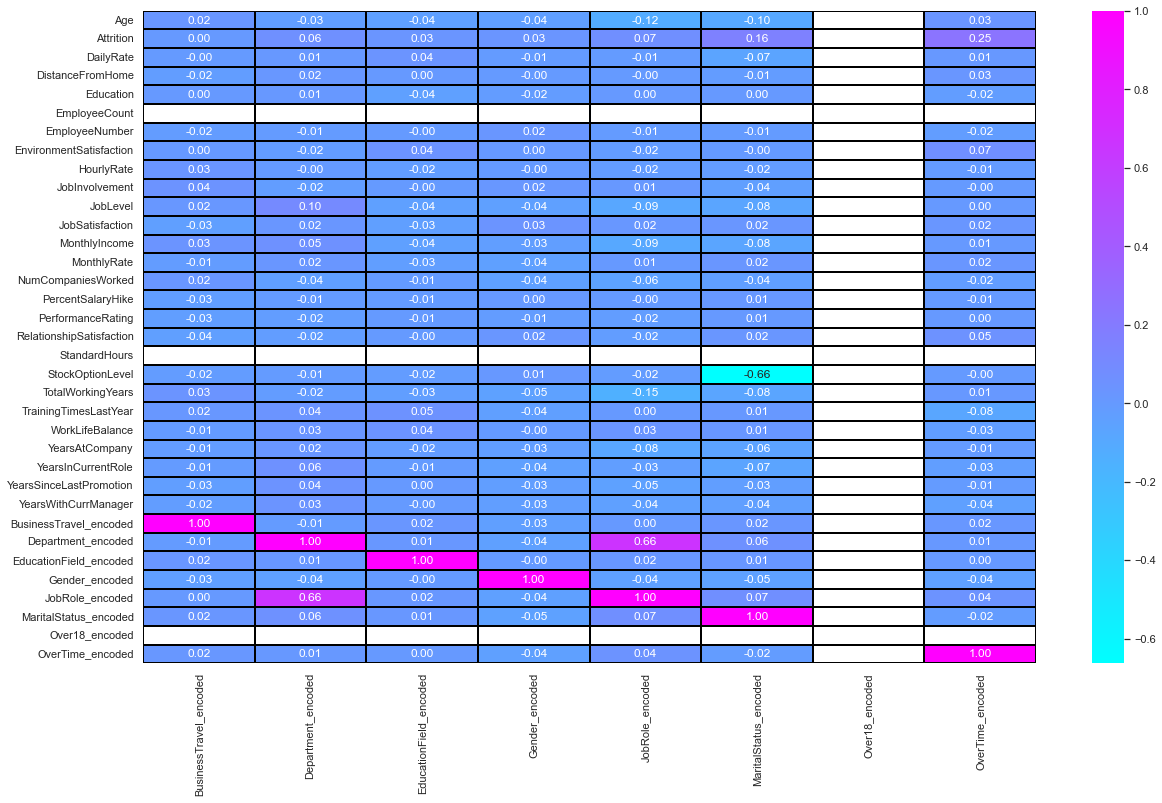

In [50]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr().iloc[:,27:], annot=True, linewidths=0.3, linecolor='black', fmt='.2f', cmap='cool')
plt.show()

# Verbal Translation Of Above Graph:
    
1. There is high multicollinearity between Stock Option Level and Marital Status Encoded.

2. All other features display odest multicollinearity.

# Data Handling Conclusion Of Correlation

# Overall correlation among dataset. There seems some multicollinearity due to presence of Job Level and Age; Marital Status Encoded and Stock Option Level; that show strong correlation between each other. Other than these columns there seems modest collinearity among features. We will do further eda befor arriving at a conclusion to delete these columns.

The most useful feature is Business Travel, apart from this, there seems modest correlation of features with label.

As a conclusion, we will do further cause and effect analysis based on skewness and distribution plots to conclude if we want to remove multicollinarity pairs:

i. Job Level and Age

ii. Marital Status Encoded and Stock Option Level

# Dataset Information Table

In [37]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int32  
 2   DailyRate                 1470 non-null   int64  
 3   DistanceFromHome          1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   EmployeeCount             1470 non-null   int64  
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   HourlyRate                1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobSatisfaction           1470 non-null   int64  
 12  MonthlyIncome             1470 non-null   int64  
 13  MonthlyRate               1470 non-null   int64  
 14  NumCompa

# The above table reprents information dataset:
    
i. Columns

ii. Count Of Non Null Data Points

iii. Values data type for each columns

iv. Count of data types in iii.

v. Memory Usage

It can be deduced that the dataset has 1470 rows and each columns has no missing values. The datatype used are float64, int32 and int64. There 8 float64 columns, 1 int 32 column and 26 int64 columns. Memory usage is 396.3 KB.

# Names of all the columns

In [38]:
data.select_dtypes(include = [np.number]).columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_encoded', 'Department_encoded',
       'EducationField_encoded', 'Gender_encoded', 'JobRole_encoded',
       'MaritalStatus_encoded', 'Over18_encoded', 'OverTime_encoded'],
      dtype='object')

# The above code cell highlights all numberic values, that will be used to derive following graphs.

# Box Plot To Detect Outliers

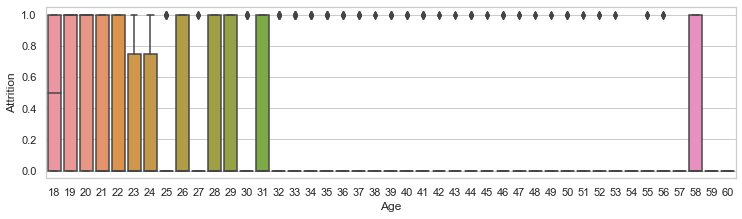

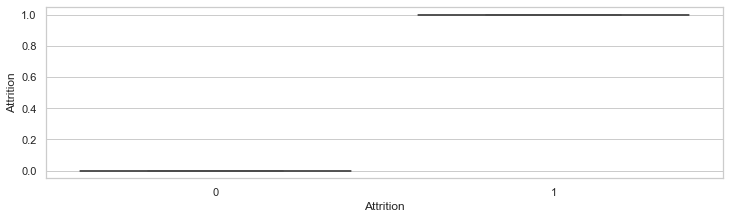

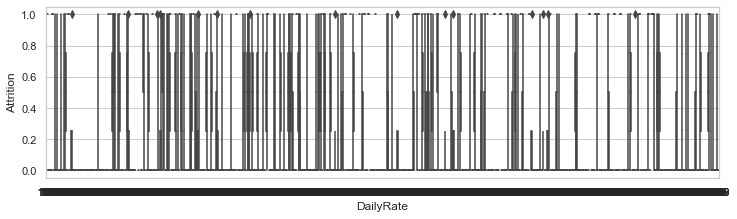

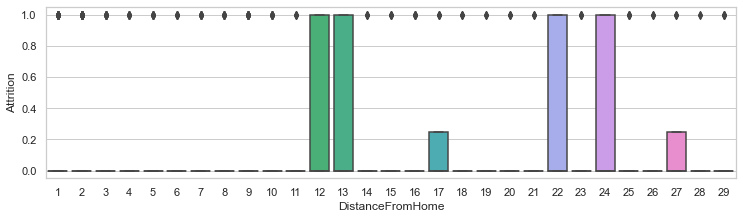

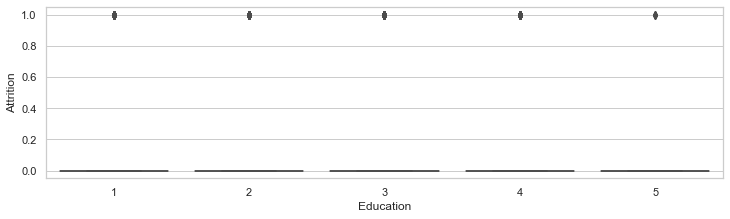

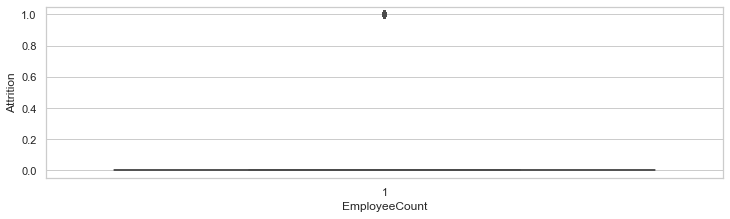

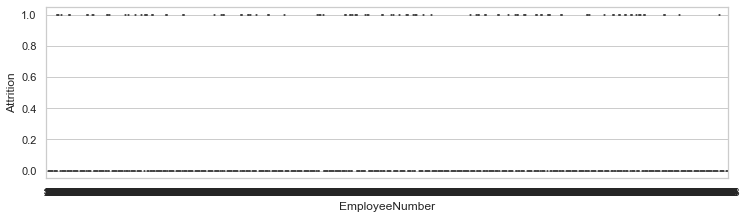

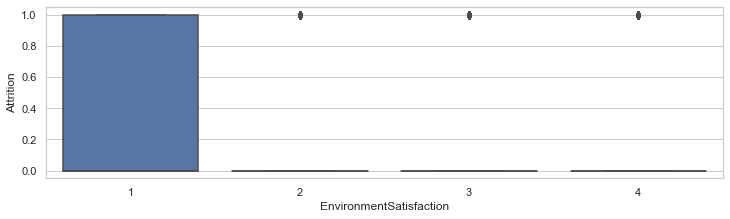

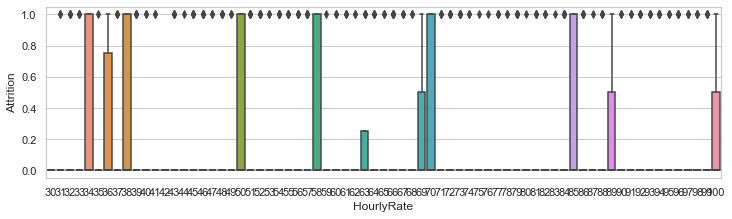

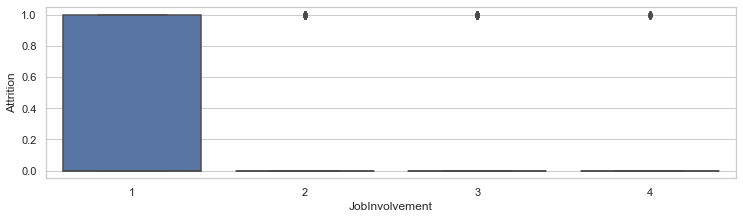

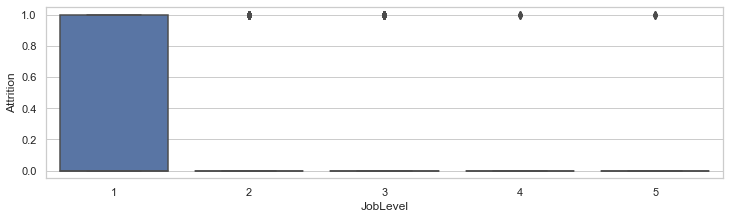

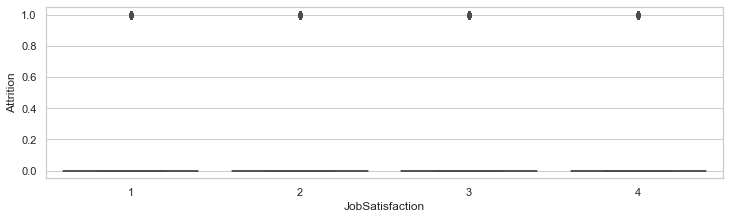

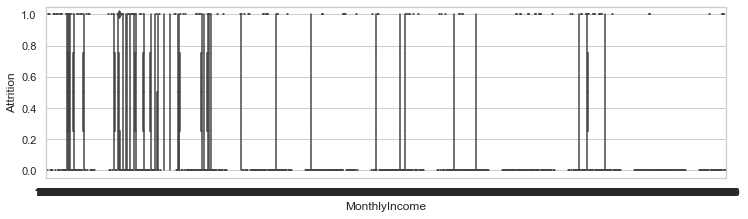

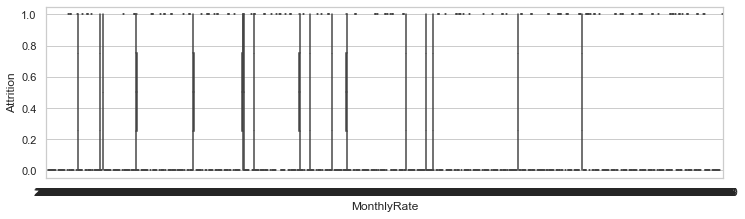

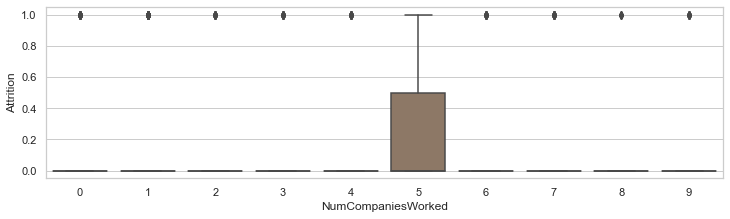

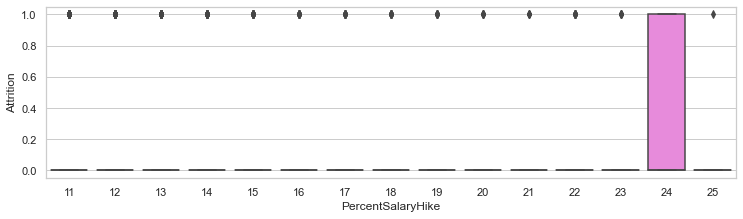

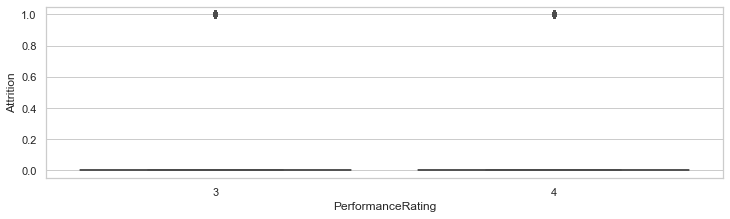

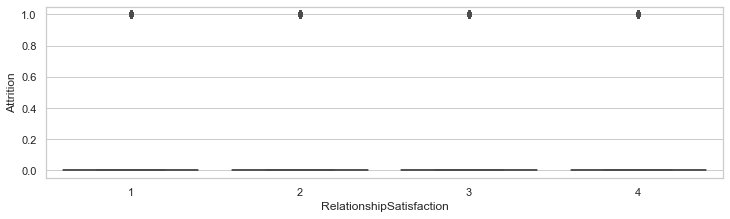

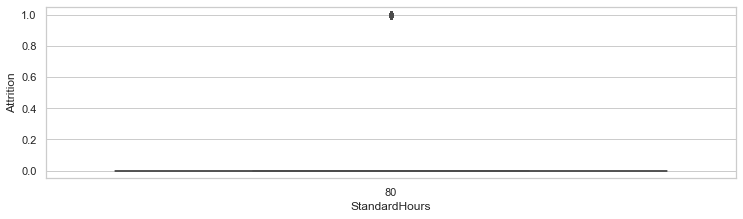

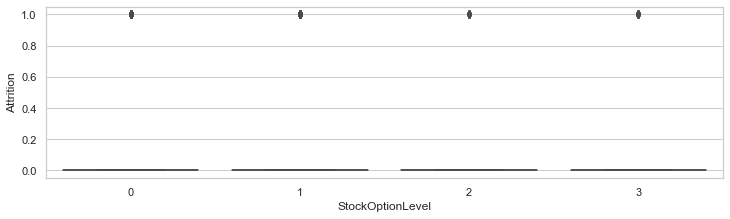

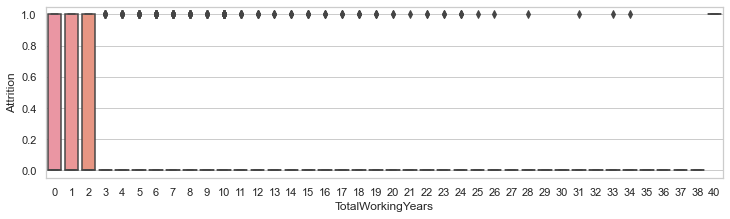

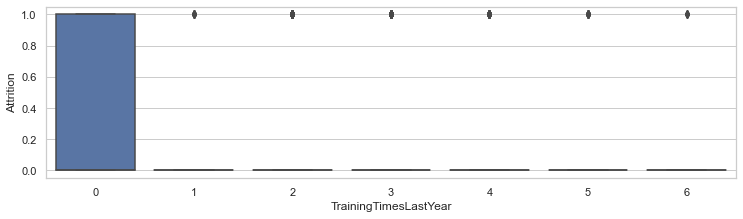

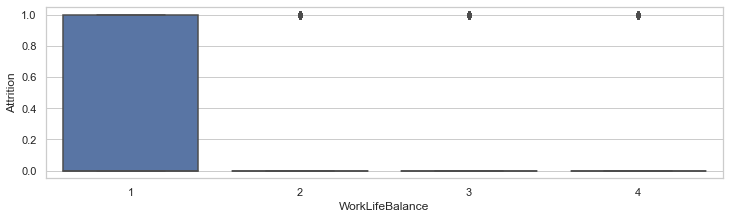

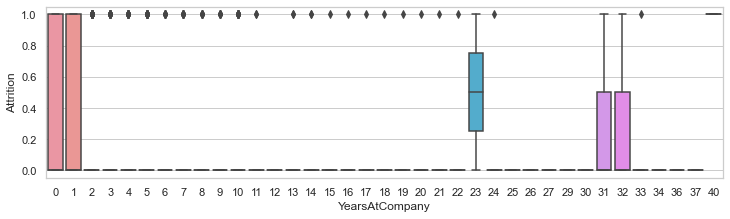

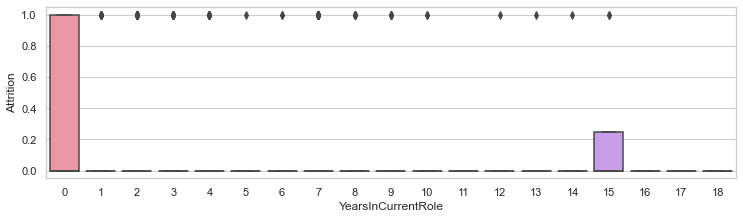

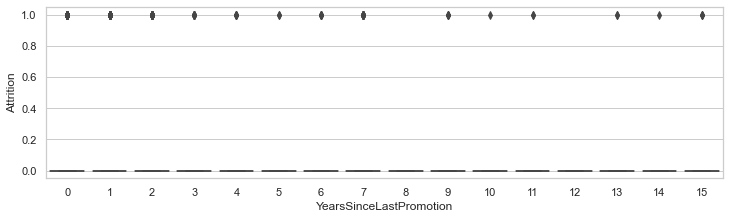

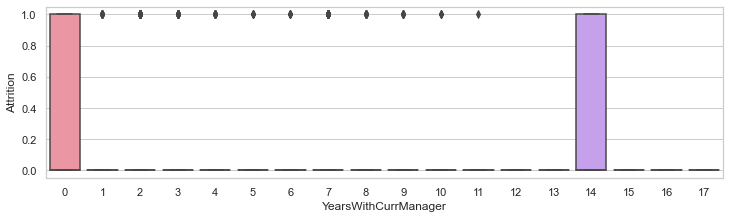

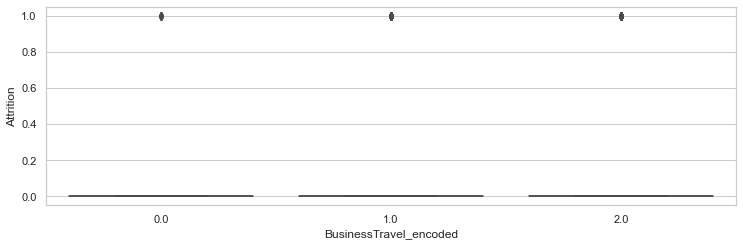

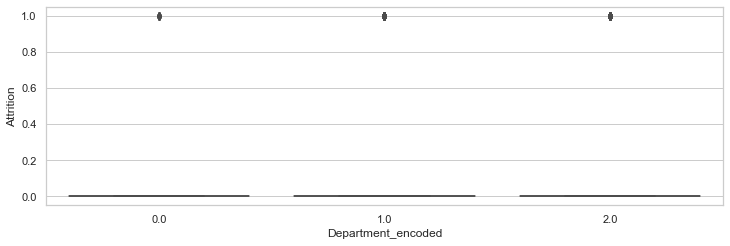

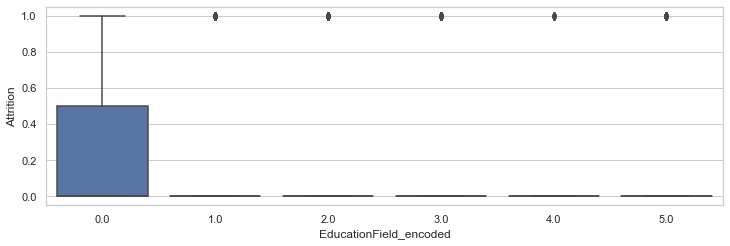

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [35]:
colist=final_dataframe.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
for x in range(len(colist)):
    try:
        sns.set_theme(style='whitegrid')
        plt.figure(figsize=(30,30))
        plt.subplot(nrows, ncol, x+1)
        sns.boxplot(x=colist[x], y='Attrition', data=final_dataframe)
        plt.tight_layout()
    except ValueError:
        continue

# Verbal Translation Of Above Graph
1. The data is mostly free of outliers.

2. A few outliers are detected in:

i. Hourly Rate

ii. Years At Company

iii. Education Field Encoded

# Data Handling Conclusion For Outliers

# Box plot does not extend to even upper quartile for most of the cases, Hence we will study skewness to arrive at final conclusion about multicollinearity and outliers detected.

# Descriptive Statistics

In [39]:
description=final_dataframe.describe()
description

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1.093082    20.329428   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      491.250000                 2.000000    48.000000   
50%              1.0     1020.500000                 3.000000    66.000000   
75%              1.0     1555.750000                 4.000000    83.750000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement  ...  YearsSinceLastPromotion  YearsWithCurrManager  \
count     1470.000000  ...              1470.000000           1470.000000   
mean         2.729932  ...                 2.187755              4.123129   
std          0.711561  ...                 3.222430              3.568136   
min          1.000000  ...                 0.000000              0.000000   
25%          2.000000  ...                 0.000000              2.000000   
50%          3.000000  ...                 1.000000              3.000000   
75%          3.000000  ...                 3.000000              7.000000   
max          4.000000  ...                15.000000             17.000000   

       BusinessTravel_encoded  Department_encoded  EducationField_encoded  \
count             1470.000000         1470.000000             1470.000000   
mean                 1.607483            1.260544                2.247619   
std                  0.665455            0.527792                1.331369   
min                  0.000000            0.000000                0.000000   
25%                  1.000000            1.000000                1.000000   
50%                  2.000000            1.000000                2.000000   
75%                  2.000000            2.000000                3.000000   
max                  2.000000            2.000000                5.000000   

       Gender_encoded  JobRole_encoded  MaritalStatus_encoded  Over18_encoded  \
count     1470.000000      1470.000000            1470.000000          1470.0   
mean         0.600000         4.458503               1.097279             0.0   
std          0.490065         2.461821               0.730121             0.0   
min          0.000000         0.000000               0.000000             0.0   
25%          0.000000         2.000000               1.000000             0.0   
50%          1.000000         5.000000               1.000000             0.0   
75%          1.000000         7.000000               2.000000             0.0   
max          1.000000         8.000000               2.000000             0.0   

       OverTime_encoded  
count       1470.000000  
mean           0.282993  
std            0.450606  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000  

[8 rows x 35 columns]

In [40]:
lst=description.columns.to_list()
print(lst)

['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_encoded', 'Department_encoded', 'EducationField_encoded', 'Gender_encoded', 'JobRole_encoded', 'MaritalStatus_encoded', 'Over18_encoded', 'OverTime_encoded']


In [41]:
lst1=[]
for x in range(len(lst)):
    lst1.append([description.iloc[6,x]-description.iloc[5,x]])
len(lst1), print(lst1)

[[7.0], [0.0], [355.0], [7.0], [1.0], [0.0], [535.25], [1.0], [17.75], [0.0], [1.0], [1.0], [3460.0], [6226.0], [2.0], [4.0], [0.0], [1.0], [0.0], [0.0], [5.0], [0.0], [0.0], [4.0], [4.0], [2.0], [4.0], [0.0], [1.0], [1.0], [0.0], [2.0], [1.0], [0.0], [1.0]]


(35, None)

In [42]:
lst1_frame=pd.DataFrame(data=lst1, index=lst, columns=['IQR'])
lst1_frame=lst1_frame.T
lst1_frame

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
IQR  7.0        0.0      355.0               7.0        1.0            0.0   

     EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
IQR          535.25                      1.0       17.75             0.0  ...   

     YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_encoded  \
IQR                      2.0                   4.0                     0.0   

     Department_encoded  EducationField_encoded  Gender_encoded  \
IQR                 1.0                     1.0             0.0   

     JobRole_encoded  MaritalStatus_encoded  Over18_encoded  OverTime_encoded  
IQR              2.0                    1.0             0.0               1.0  

[1 rows x 35 columns]

In [43]:
lst3=[]
for x in range(len(lst)):
    lst3.append([description.iloc[7,x]-description.iloc[3,x]])
len(lst3), print(lst3)

[[42.0], [1.0], [1397.0], [28.0], [4.0], [0.0], [2067.0], [3.0], [70.0], [3.0], [4.0], [3.0], [18990.0], [24905.0], [9.0], [14.0], [1.0], [3.0], [0.0], [3.0], [40.0], [6.0], [3.0], [40.0], [18.0], [15.0], [17.0], [2.0], [2.0], [5.0], [1.0], [8.0], [2.0], [0.0], [1.0]]


(35, None)

In [44]:
lst3_frame=pd.DataFrame(data=lst3, index=lst, columns=['Range'])
lst3_frame=lst3_frame.T
lst3_frame

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
Range  42.0        1.0     1397.0              28.0        4.0            0.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Range          2067.0                      3.0        70.0             3.0   

       ...  YearsSinceLastPromotion  YearsWithCurrManager  \
Range  ...                     15.0                  17.0   

       BusinessTravel_encoded  Department_encoded  EducationField_encoded  \
Range                     2.0                 2.0                     5.0   

       Gender_encoded  JobRole_encoded  MaritalStatus_encoded  Over18_encoded  \
Range             1.0              8.0                    2.0             0.0   

       OverTime_encoded  
Range               1.0  

[1 rows x 35 columns]

In [45]:
lst5=pd.DataFrame(data=final_dataframe.skew().to_list(), index=lst, columns=['Skewness'])
lst5=lst5.T
lst6=pd.DataFrame(data=final_dataframe.kurtosis().to_list(), index=lst, columns=['Kurtosis'])
lst6=lst6.T
lst5, lst6

(               Age  Attrition  DailyRate  DistanceFromHome  Education  \
 Skewness  0.413286   1.844366  -0.003519          0.958118  -0.289681   
 
           EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
 Skewness            0.0        0.016574                -0.321654   -0.032311   
 
           JobInvolvement  ...  YearsSinceLastPromotion  YearsWithCurrManager  \
 Skewness       -0.498419  ...                  1.98429              0.833451   
 
           BusinessTravel_encoded  Department_encoded  EducationField_encoded  \
 Skewness               -1.439006            0.172231                0.550371   
 
           Gender_encoded  JobRole_encoded  MaritalStatus_encoded  \
 Skewness       -0.408665         -0.35727              -0.152175   
 
           Over18_encoded  OverTime_encoded  
 Skewness             0.0          0.964489  
 
 [1 rows x 35 columns],
                Age  Attrition  DailyRate  DistanceFromHome  Education  \
 Kurtosis -0.404145   1.40

# Outcome Table Of Descriptive Statistics

In [46]:
description1=pd.concat([description, lst1_frame, lst3_frame, lst5, lst6])
description1

Age    Attrition    DailyRate  DistanceFromHome  \
count     1470.000000  1470.000000  1470.000000       1470.000000   
mean        36.923810     0.161224   802.485714          9.192517   
std          9.135373     0.367863   403.509100          8.106864   
min         18.000000     0.000000   102.000000          1.000000   
25%         30.000000     0.000000   465.000000          2.000000   
50%         36.000000     0.000000   802.000000          7.000000   
75%         43.000000     0.000000  1157.000000         14.000000   
max         60.000000     1.000000  1499.000000         29.000000   
IQR          7.000000     0.000000   355.000000          7.000000   
Range       42.000000     1.000000  1397.000000         28.000000   
Skewness     0.413286     1.844366    -0.003519          0.958118   
Kurtosis    -0.404145     1.403594    -1.203823         -0.224833   

            Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
count     1470.000000         1470.0     1470.000000              1470.000000   
mean         2.912925            1.0     1024.865306                 2.721769   
std          1.024165            0.0      602.024335                 1.093082   
min          1.000000            1.0        1.000000                 1.000000   
25%          2.000000            1.0      491.250000                 2.000000   
50%          3.000000            1.0     1020.500000                 3.000000   
75%          4.000000            1.0     1555.750000                 4.000000   
max          5.000000            1.0     2068.000000                 4.000000   
IQR          1.000000            0.0      535.250000                 1.000000   
Range        4.000000            0.0     2067.000000                 3.000000   
Skewness    -0.289681            0.0        0.016574                -0.321654   
Kurtosis    -0.559115            0.0       -1.223179                -1.202521   

           HourlyRate  JobInvolvement  ...  YearsSinceLastPromotion  \
count     1470.000000     1470.000000  ...              1470.000000   
mean        65.891156        2.729932  ...                 2.187755   
std         20.329428        0.711561  ...                 3.222430   
min         30.000000        1.000000  ...                 0.000000   
25%         48.000000        2.000000  ...                 0.000000   
50%         66.000000        3.000000  ...                 1.000000   
75%         83.750000        3.000000  ...                 3.000000   
max        100.000000        4.000000  ...                15.000000   
IQR         17.750000        0.000000  ...                 2.000000   
Range       70.000000        3.000000  ...                15.000000   
Skewness    -0.032311       -0.498419  ...                 1.984290   
Kurtosis    -1.196398        0.270999  ...                 3.612673   

          YearsWithCurrManager  BusinessTravel_encoded  Department_encoded  \
count              1470.000000             1470.000000         1470.000000   
mean                  4.123129                1.607483            1.260544   
std                   3.568136                0.665455            0.527792   
min                   0.000000                0.000000            0.000000   
25%                   2.000000                1.000000            1.000000   
50%                   3.000000                2.000000            1.000000   
75%                   7.000000                2.000000            2.000000   
max                  17.000000                2.000000            2.000000   
IQR                   4.000000                0.000000            1.000000   
Range                17.000000                2.000000            2.000000   
Skewness              0.833451               -1.439006            0.172231   
Kurtosis              0.171058                0.702686           -0.391435   

          EducationField_encoded  Gender_encoded  JobRole_encoded  \
count                1470.000000     1470.000000      1470

# Graphical Representation Of Above Table

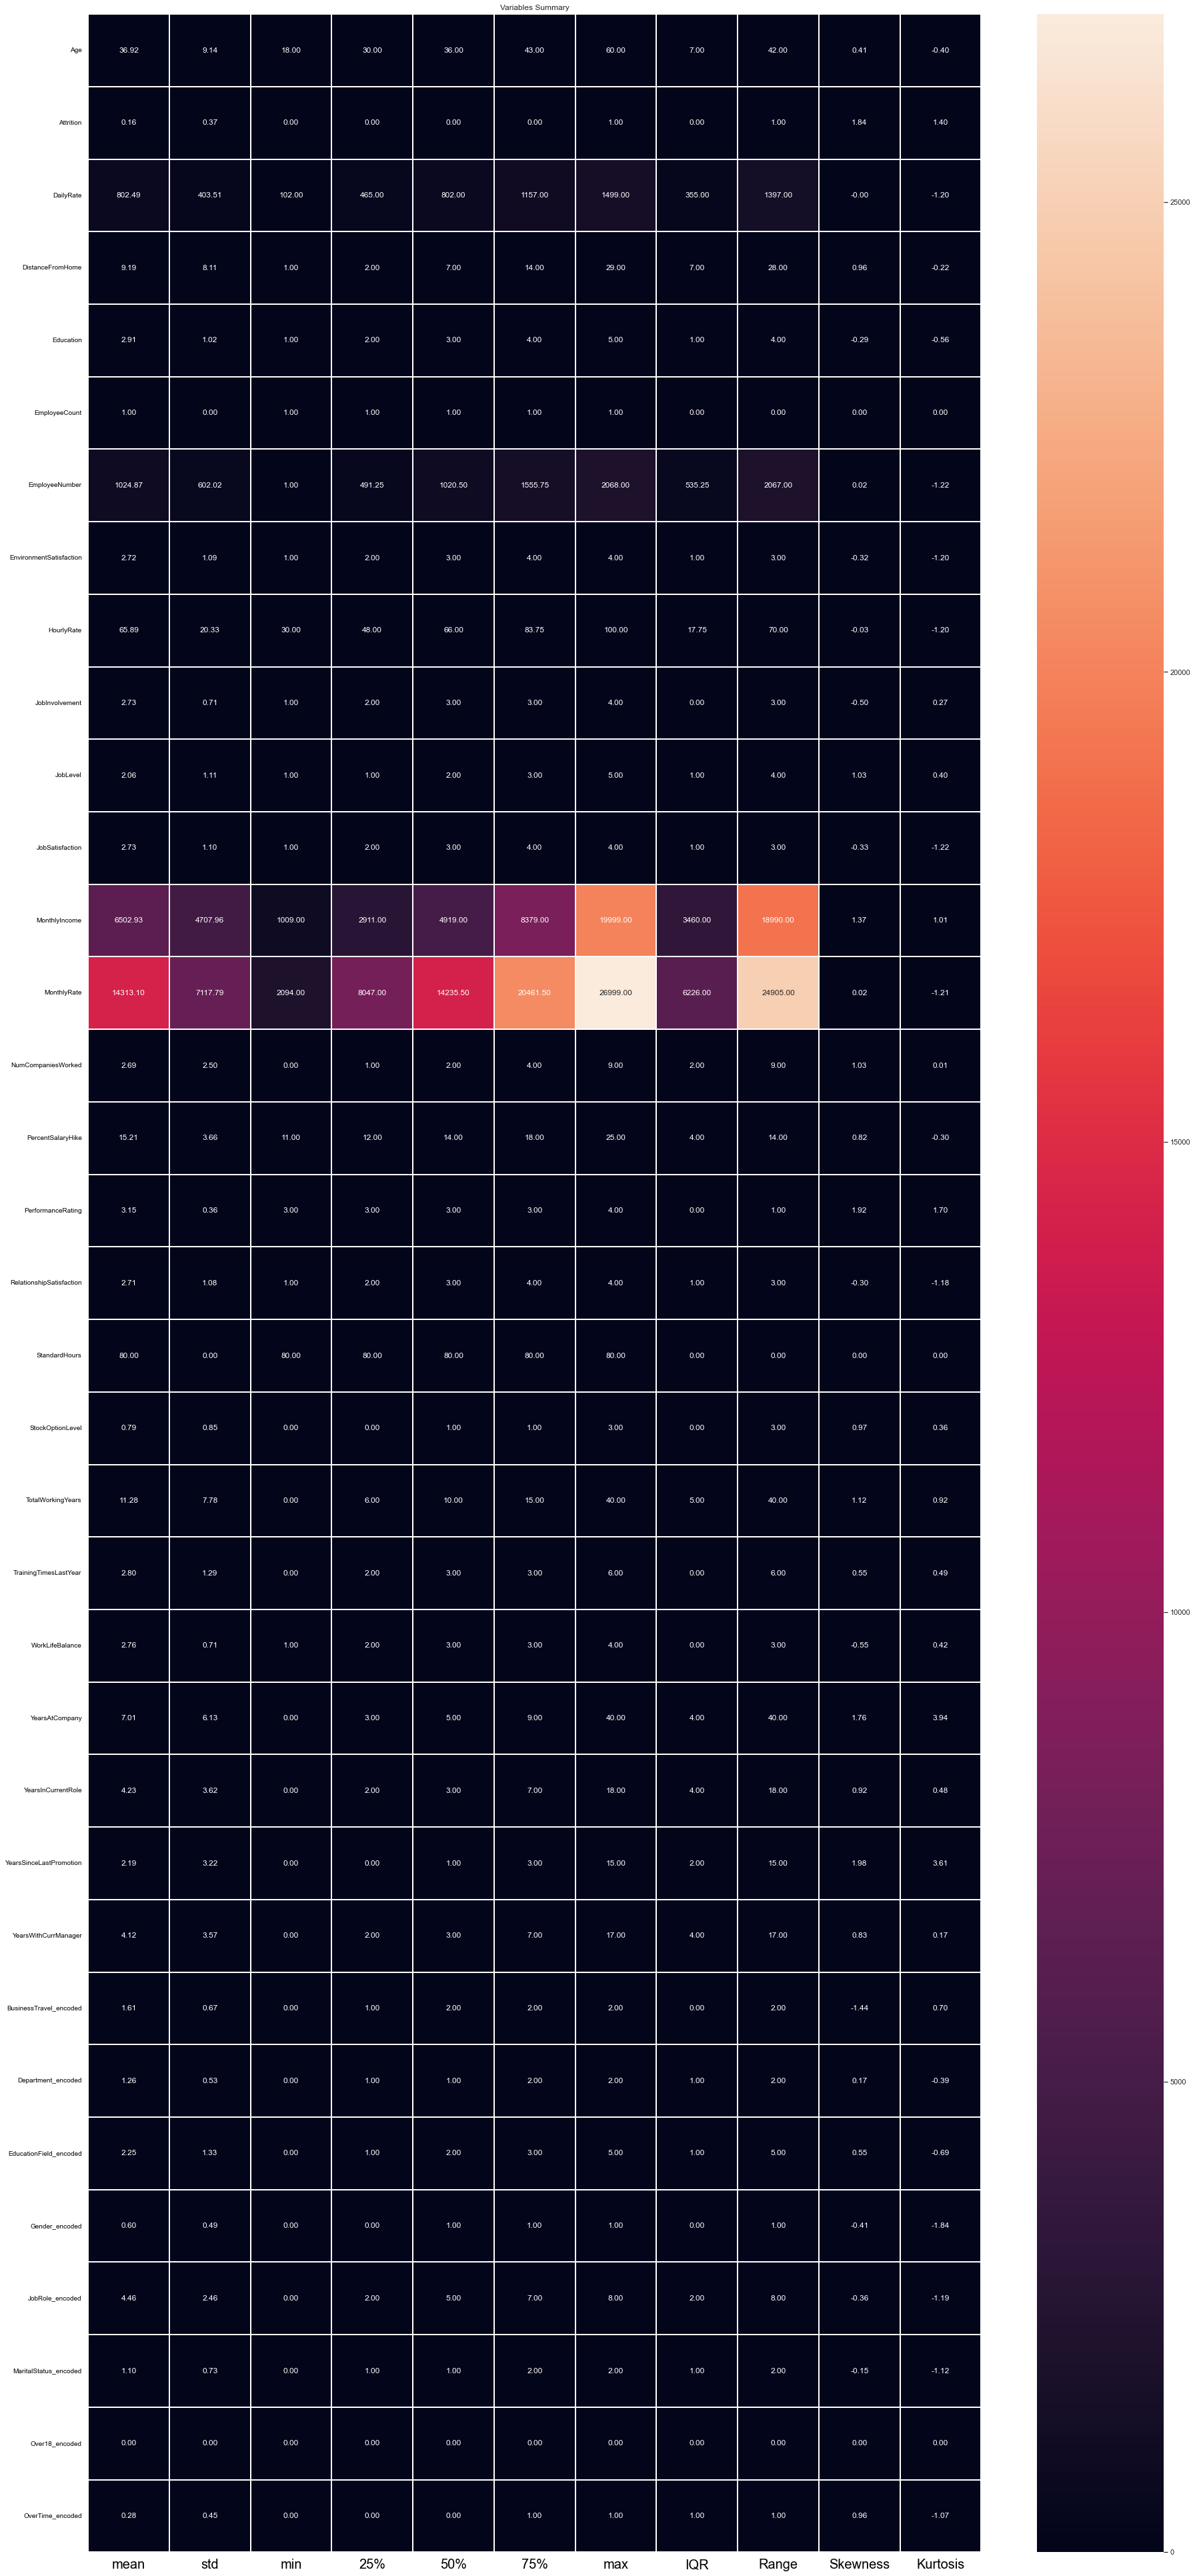

In [47]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(30,70))
sns.heatmap(round(description1[1:].transpose(),2), linewidth=2, annot=True, fmt='.2f', square=False, color='Black')
plt.xticks(fontsize=20, color='black')
plt.yticks(fontsize=10, color='black')
plt.title('Variables Summary')
plt.show()

# Mathematical Notation:
1. Mean = sum of values/count of values                                                                                     
2. std = sqrt(((value - mean of distribution)**2 / number of values ))                                                                                        
3. 3 quartile are measures of variance, calculated to spot the placeholder value, it returns index of the produced value.
Step 1: sort the dataset                                                                                                   
Step2:                                                                                                                     
i) Lower Quartile (Q1: 25% distribution) = ((number of values+1)/4)th Term                                                 
ii) Middle Quartile (Q2: 50% distribution) = ((number of values +1)/2)th Term                                               
Also, know as median (central value).                                                                                       
iii) Upper Quartile (Q3: 75% distribution) = ¾(number of values + 1)th Term                                                 
iv) IQR = Upper Quartile - Lowe Quartile                                                                                   
4. Range = Maximum Value - Minimum Value                                                                                   
5. Skewness = (sumation(value - mean of distribution)**3)/((number of values - 1) * std**3)                                 
6. Kurtosis = number of values * ((sumation(value - mean of distribution)**4) / std**4)

# Verbal Translation Of Descriptive Table And Graphic
1. For values that are scaled upto 1, mean is mostly around 0 and standard deviation is comparatively low. Hence, making the data much more acceptable by algorithms to process it more accurately.

2. The entire dataset ranges from 0 till 19999.

3. IQR, Range and Skewness and kurtosis are much more condensed in data that is scaled upto 1.

4. Skewness is 0 and within +/- 0.65 for:

WorkLifeBalance

JobInvolvement

Gender_encoded

JobRole_encoded

JobSatisfaction

EnvironmentSatisfaction

RelationshipSatisfaction

Education

MaritalStatus_encoded

HourlyRate

DailyRate

EmployeeCount

StandardHours

Over18_encoded

EmployeeNumber

MonthlyRate

Department_encoded

Age

EducationField_encoded

TrainingTimesLastYear

5. Acceptable skewness is +/- 0.65 and skewness for bell shaped curve should be 0.

6. Kutosis is upto 3 for most dataset, indicating platykurtic curves.

7. Kurtosis is greater than 3 obly for Years Since Last Promotion, indicating, leptokurtic curve.

8. Kurtosis for bell shaped curve should be 3.

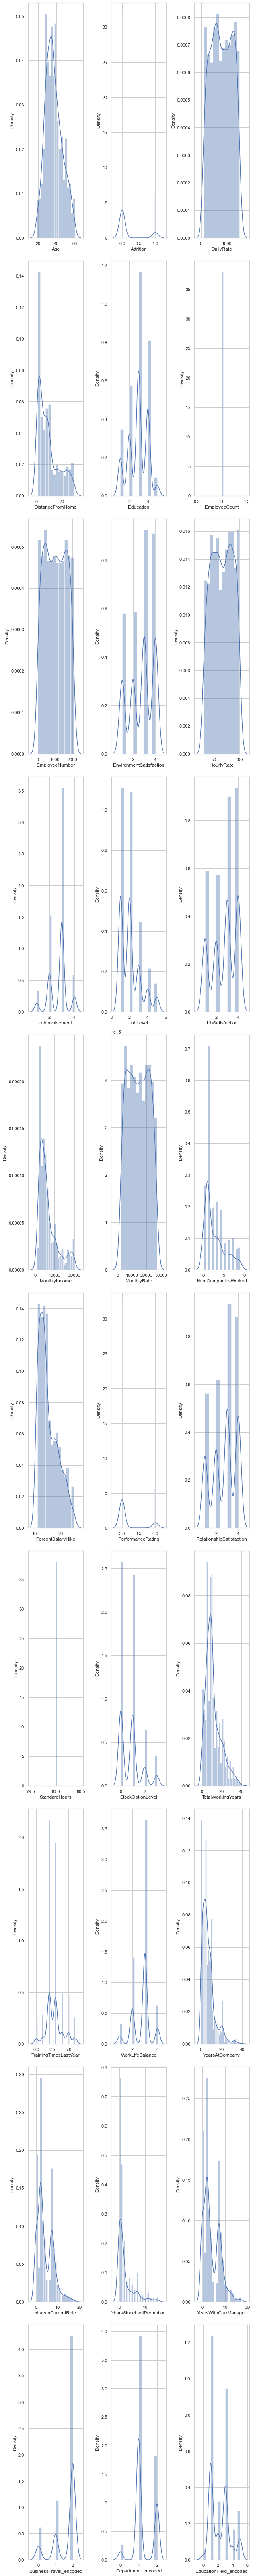

In [48]:
colist=final_dataframe.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    try:
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        sns.distplot(final_dataframe[colist[x]])
        plt.tight_layout()
    except ValueError:
        continue

# Observations
1. Acceptable skewness is +/-0.65 and Right skewness for bell shaped curve is 0

2. Acceptable and Outliers Prone Left skewness is observed in:

BusinessTravel_encoded	-1.4390059727642035

WorkLifeBalance	-0.5524802990965146

JobInvolvement	-0.4984193640419493

Gender_encoded	-0.4086654142437622

JobRole_encoded	-0.3572699195636241

JobSatisfaction	-0.3296719586636647

EnvironmentSatisfaction	-0.32165444773937907

RelationshipSatisfaction	-0.30282756517072296

Education	-0.2896810819684331

MaritalStatus_encoded	-0.1521746207726309

HourlyRate	-0.03231095290044942

DailyRate	-0.003518568352325854

3. Acceptable And Outliers Prone Right Skewness is observed in:

EmployeeNumber	0.016574019580105036

MonthlyRate	0.018577807891132458

Department_encoded	0.1722308111183741

Age	0.4132863018563338

EducationField_encoded	0.5503712491120529

TrainingTimesLastYear	0.5531241710537028

PercentSalaryHike	0.8211279755780908

YearsWithCurrManager	0.8334509919918475

YearsInCurrentRole	0.9173631562908262

DistanceFromHome	0.9581179956568269

OverTime_encoded	0.9644888640425097

StockOptionLevel	0.9689803167738937

JobLevel	1.0254012829518246

NumCompaniesWorked	1.026471111968205

TotalWorkingYears	1.1171718528128527

MonthlyIncome	1.3698166808390662

YearsAtCompany	1.7645294543422085

Attrition	1.8443661240010911

PerformanceRating	1.921882702142603

YearsSinceLastPromotion	1.9842899833524859

4. Bell Shaped Curve (O skewness) is observed in:

EmployeeCount	0.0

StandardHours	0.0

Over18_encoded	0.0

# Conclusion:
Based On EDA done above in two parts, I am romving 2 columns, as part of Error Removal And Data Handling:

i. Hourly Rate


ii. Education Field Encoded


# Error Removal And Data Handling

# Based on above analysis, these columns have significant outliers, hence, are platykurtic, hence, I am removing these columns.


i. Hourly Rate

ii. Education Field Encoded

In [49]:
final_dataframe=final_dataframe.drop(['HourlyRate', 'EducationField_encoded'], axis=1)
final_dataframe

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41          1       1102                 1          2              1   
1      49          0        279                 8          1              1   
2      37          1       1373                 2          2              1   
3      33          0       1392                 3          4              1   
4      27          0        591                 2          1              1   
...   ...        ...        ...               ...        ...            ...   
1465   36          0        884                23          2              1   
1466   39          0        613                 6          1              1   
1467   27          0        155                 4          3              1   
1468   49          0       1023                 2          3              1   
1469   34          0        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  JobInvolvement  JobLevel  ...  \
0                  1                        2               3         2  ...   
1                  2                        3               2         2  ...   
2                  4                        4               2         1  ...   
3                  5                        4               3         1  ...   
4                  7                        1               3         1  ...   
...              ...                      ...             ...       ...  ...   
1465            2061                        3               4         2  ...   
1466            2062                        4               2         3  ...   
1467            2064                        2               4         2  ...   
1468            2065                        4               2         2  ...   
1469            2068                        2               4         2  ...   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                      4                        0                     5   
1                      7                        1                     7   
2                      0                        0                     0   
3                      7                        3                     0   
4                      2                        2                     2   
...                  ...                      ...                   ...   
1465                   2                        0                     3   
1466                   7                        1                     7   
1467                   2                        0                     3   
1468                   6                        0                     8   
1469                   3                        1                     2   

      BusinessTravel_encoded  Department_encoded  Gender_encoded  \
0                        2.0                 2.0             0.0   
1                        1.0                 1.0             1.0   
2                        2.0                 1.0             1.0   
3                        1.0                 1.0             0.0   
4                        2.0                 1.0             1.0   
...                      ...                 ...             ...   
1465                     1.0                 1.0             1.0   
1466                     2.0                 1.0             1.0   
1467                     2.0                 1.0             1.0   
1468                     1.0                 2.0             1.0   
1469                     2.0                 1.0             1.0   

      JobRole_encoded  MaritalStatus_encoded  Over18_encoded  OverTime_encoded  
0                 7.0                    2.0             0.0               1.0  
1                 6.0                    1.0             0.0               0.0  
2                 2.0                    2.0             0.0               1.0  
3                 6.0                    1.0          

# The above table represents final dataframe that will go through machine learning  techniques of outliers treatment

# Z Score: Outliers Treatment

In [50]:
import numpy as np
from scipy.stats import stats
from sklearn.preprocessing import StandardScaler
final_dataframe[np.isinf(final_dataframe)] = 0
scaled = StandardScaler()
final_dataframe=final_dataframe.fillna(method='ffill')
scaled.fit(final_dataframe)
scaled_data = scaled.transform(final_dataframe)
score=np.abs(stats.zscore(scaled_data))
score.shape

(1470, 33)

In [51]:
#threshold=(-3,3)
threshold=3
print(np.where(score>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([25, 24, 22, 24, 23, 24, 19, 19, 22, 24, 23, 24, 25, 19, 22, 24, 25,
       24, 19, 25, 22, 23, 24, 23, 25, 22, 24, 19, 22, 23, 24, 24, 25, 19,
       22, 22, 24, 24, 19, 23, 22, 22, 24, 22, 25, 24, 22, 19, 22, 24, 25,
       19, 25, 22, 24, 

# The cell above displays outlier values.

In [52]:
len(np.where(score>3)[0])

110

# The cell above shows number of outliers.

In [53]:
data_new=final_dataframe[(score<3).all(axis=1)]
data_new

Empty DataFrame
Columns: [Age, Attrition, DailyRate, DistanceFromHome, Education, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, BusinessTravel_encoded, Department_encoded, Gender_encoded, JobRole_encoded, MaritalStatus_encoded, Over18_encoded, OverTime_encoded]
Index: []

[0 rows x 33 columns]

# The table above shows the final dataframe after removing outliers, 8 rows are removed and resultant dimension is 0 rows * 33 columns

# IQR Method Of Outliers Removal

# Since, all the rows are removed by z method, hence, I will try IQR Method of outliers removal and power transformation method of outliers transformation.

In [54]:
Q1= final_dataframe[final_dataframe.columns].quantile(0.25)
Q3 = final_dataframe[final_dataframe.columns].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# The above code calculates IQR as discussed in descriptive statistics section of eda. It Upper Limit and Lower Limit of distribution curve.

In [55]:
final_dataframe[(final_dataframe[final_dataframe.columns] < lower_limit) | (final_dataframe[final_dataframe.columns] > upper_limit)] # outliers

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0     NaN        1.0        NaN               NaN        NaN            NaN   
1     NaN        NaN        NaN               NaN        NaN            NaN   
2     NaN        1.0        NaN               NaN        NaN            NaN   
3     NaN        NaN        NaN               NaN        NaN            NaN   
4     NaN        NaN        NaN               NaN        NaN            NaN   
...   ...        ...        ...               ...        ...            ...   
1465  NaN        NaN        NaN               NaN        NaN            NaN   
1466  NaN        NaN        NaN               NaN        NaN            NaN   
1467  NaN        NaN        NaN               NaN        NaN            NaN   
1468  NaN        NaN        NaN               NaN        NaN            NaN   
1469  NaN        NaN        NaN               NaN        NaN            NaN   

      EmployeeNumber  EnvironmentSatisfaction  JobInvolvement  JobLevel  ...  \
0                NaN                      NaN             NaN       NaN  ...   
1                NaN                      NaN             NaN       NaN  ...   
2                NaN                      NaN             NaN       NaN  ...   
3                NaN                      NaN             NaN       NaN  ...   
4                NaN                      NaN             NaN       NaN  ...   
...              ...                      ...             ...       ...  ...   
1465             NaN                      NaN             NaN       NaN  ...   
1466             NaN                      NaN             NaN       NaN  ...   
1467             NaN                      NaN             NaN       NaN  ...   
1468             NaN                      NaN             NaN       NaN  ...   
1469             NaN                      NaN             NaN       NaN  ...   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                    NaN                      NaN                   NaN   
1                    NaN                      NaN                   NaN   
2                    NaN                      NaN                   NaN   
3                    NaN                      NaN                   NaN   
4                    NaN                      NaN                   NaN   
...                  ...                      ...                   ...   
1465                 NaN                      NaN                   NaN   
1466                 NaN                      NaN                   NaN   
1467                 NaN                      NaN                   NaN   
1468                 NaN                      NaN                   NaN   
1469                 NaN                      NaN                   NaN   

      BusinessTravel_encoded  Department_encoded  Gender_encoded  \
0                        NaN                 NaN             NaN   
1                        NaN                 NaN             NaN   
2                        NaN                 NaN             NaN   
3                        NaN                 NaN             NaN   
4                        NaN                 NaN             NaN   
...                      ...                 ...             ...   
1465                     NaN                 NaN             NaN   
1466                     NaN                 NaN             NaN   
1467                     NaN                 NaN             NaN   
1468                     NaN                 NaN             NaN   
1469                     NaN                 NaN             NaN   

      JobRole_encoded  MaritalStatus_encoded  Over18_encoded  OverTime_encoded  
0                 NaN                    NaN             NaN               NaN  
1                 NaN                    NaN             NaN               NaN  
2                 NaN                    NaN             NaN               NaN  
3                 NaN                    NaN          

# The above table displays, outliers detected by IQR Method, it displays all values beyond upper and lower limit and places NaN on all the values that are significant and within upper and lower limits.

In [56]:
new_df = final_dataframe[(final_dataframe[final_dataframe.columns] > lower_limit) & (final_dataframe[final_dataframe.columns] < upper_limit)]

In [57]:
new_df=new_df.fillna(method='bfill')
new_df

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41        NaN       1102                 1          2            NaN   
1      49        NaN        279                 8          1            NaN   
2      37        NaN       1373                 2          2            NaN   
3      33        NaN       1392                 3          4            NaN   
4      27        NaN        591                 2          1            NaN   
...   ...        ...        ...               ...        ...            ...   
1465   36        NaN        884                23          2            NaN   
1466   39        NaN        613                 6          1            NaN   
1467   27        NaN        155                 4          3            NaN   
1468   49        NaN       1023                 2          3            NaN   
1469   34        NaN        628                 8          3            NaN   

      EmployeeNumber  EnvironmentSatisfaction  JobInvolvement  JobLevel  ...  \
0                  1                        2               3         2  ...   
1                  2                        3               2         2  ...   
2                  4                        4               2         1  ...   
3                  5                        4               3         1  ...   
4                  7                        1               3         1  ...   
...              ...                      ...             ...       ...  ...   
1465            2061                        3               4         2  ...   
1466            2062                        4               2         3  ...   
1467            2064                        2               4         2  ...   
1468            2065                        4               2         2  ...   
1469            2068                        2               4         2  ...   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                    4.0                      0.0                   5.0   
1                    7.0                      1.0                   7.0   
2                    0.0                      0.0                   0.0   
3                    7.0                      3.0                   0.0   
4                    2.0                      2.0                   2.0   
...                  ...                      ...                   ...   
1465                 2.0                      0.0                   3.0   
1466                 7.0                      1.0                   7.0   
1467                 2.0                      0.0                   3.0   
1468                 6.0                      0.0                   8.0   
1469                 3.0                      1.0                   2.0   

      BusinessTravel_encoded  Department_encoded  Gender_encoded  \
0                        2.0                 2.0             0.0   
1                        1.0                 1.0             1.0   
2                        2.0                 1.0             1.0   
3                        1.0                 1.0             0.0   
4                        2.0                 1.0             1.0   
...                      ...                 ...             ...   
1465                     1.0                 1.0             1.0   
1466                     2.0                 1.0             1.0   
1467                     2.0                 1.0             1.0   
1468                     1.0                 2.0             1.0   
1469                     2.0                 1.0             1.0   

      JobRole_encoded  MaritalStatus_encoded  Over18_encoded  OverTime_encoded  
0                 7.0                    2.0             NaN               1.0  
1                 6.0                    1.0             NaN               0.0  
2                 2.0                    2.0             NaN               1.0  
3                 6.0                    1.0          

# The above table displays the final dataframe after IQR  treatment, since this method restores all the rows. It signifies that outliers are not very much spread and can be treated with power transform method.

# I prefer IQR+ Power Transform in this case because outliers are not very significant

# Vectorization

# I have divided the datset into X and Y vectors by removing label and its transformation from features vector.

Label vector is Attrition.

In [58]:
x=final_dataframe.drop(['Attrition'], axis=1)
y=final_dataframe['Attrition']
x.sample()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
492   48       1236                 1          4              1   

     EmployeeNumber  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
492             664                        4               2         4   

     JobSatisfaction  ...  YearsInCurrentRole  YearsSinceLastPromotion  \
492                1  ...                   2                        0   

     YearsWithCurrManager  BusinessTravel_encoded  Department_encoded  \
492                     2                     2.0                 1.0   

     Gender_encoded  JobRole_encoded  MaritalStatus_encoded  Over18_encoded  \
492             0.0              3.0                    1.0             0.0   

     OverTime_encoded  
492               0.0  

[1 rows x 32 columns]

# The above table displays a sample of features vector.

In [59]:
y.sample()

1389    0
Name: Attrition, dtype: int32

# The above series displays a sample of label series.

# Outliers Transformation With Power Transform

In [60]:
from sklearn.preprocessing import power_transform
x_array=power_transform(x, method='yeo-johnson')
x_frame=pd.DataFrame(x_array, columns=x.columns)
x_frame

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0     0.522140   0.759289         -1.494085  -0.916940            0.0   
1     1.276411  -1.334597          0.243416  -1.771185            0.0   
2     0.102091   1.340365         -1.031215  -0.916940            0.0   
3    -0.353971   1.379936         -0.700347   1.082871            0.0   
4    -1.123755  -0.453941         -1.031215  -1.771185            0.0   
...        ...        ...               ...        ...            ...   
1465 -0.008279   0.264672          1.407126  -0.916940            0.0   
1466  0.316210  -0.397219         -0.050827  -1.771185            0.0   
1467 -1.123755  -1.751713         -0.442291   0.040522            0.0   
1468  1.276411   0.583235         -1.031215   0.040522            0.0   
1469 -0.236188  -0.358845          0.243416   0.040522            0.0   

      EmployeeNumber  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0          -2.164110                -0.706596        0.326033  0.241622   
1          -2.154174                 0.208597       -1.058710  0.241622   
2          -2.136953                 1.209516       -1.058710 -1.170135   
3          -2.129176                 1.209516        0.326033 -1.170135   
4          -2.114724                -1.518118        0.326033 -1.170135   
...              ...                      ...             ...       ...   
1465        1.536992                 0.208597        2.014107  0.241622   
1466        1.538245                 1.209516       -1.058710  1.009822   
1467        1.540748                -0.706596        2.014107  0.241622   
1468        1.542000                 1.209516       -1.058710  0.241622   
1469        1.545754                -0.706596        2.014107  0.241622   

      JobSatisfaction  ...  YearsInCurrentRole  YearsSinceLastPromotion  \
0            1.192743  ...            0.205562                -1.094862   
1           -0.709062  ...            0.883888                 0.096854   
2            0.197856  ...           -1.596434                -1.094862   
3            0.197856  ...            0.883888                 0.905592   
4           -0.709062  ...           -0.446645                 0.607464   
...               ...  ...                 ...                      ...   
1465         1.192743  ...           -0.446645                -1.094862   
1466        -1.509980  ...            0.883888                 0.096854   
1467        -0.709062  ...           -0.446645                -1.094862   
1468        -0.709062  ...            0.682995                -1.094862   
1469         0.197856  ...           -0.089615                 0.096854   

      YearsWithCurrManager  BusinessTravel_encoded  Department_encoded  \
0                 0.490147                0.635468            1.377454   
1                 0.909635               -1.392865           -0.472127   
2                -1.550156                0.635468           -0.472127   
3                -1.550156               -1.392865           -0.472127   
4                -0.406881                0.635468           -0.472127   
...                    ...                     ...                 ...   
1465             -0.053000               -1.392865           -0.472127   
1466              0.909635                0.635468           -0.472127   
1467             -0.053000                0.635468           -0.472127   
1468              1.090110               -1.392865            1.377454   
1469             -0.406881                0.635468           -0.472127   

      Gender_encoded  JobRole_encoded  MaritalStatus_encoded  Over18_encoded  \
0          -1.224745         1.040668               1.235505             0.0   
1           0.816497         0.621571              -0.131447             0.0   
2           0.816497        -1.008957               1.235505             0.0   
3          -1.224745         0.621571              -0.131447             0.0   
4           0.816497        -1.008957      

# The above table displays outliers transformed values as discussed above.

In [61]:
x_frame[np.isinf(x_frame)] = 0
x_frame[np.isnan(x_frame)]=0

# In the above cell, I have filled infinite and na values with 0, in case those arose during the process of transformation.

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler([0,1])
scaled.fit(x_frame)
scaled_data = scaled.transform(x_frame)
scaled_data

array([[0.65166406, 0.76346238, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.81083496, 0.17452262, 0.54820988, ..., 0.50125343, 0.        ,
        0.        ],
       [0.56302291, 0.92689926, 0.14604296, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.30433731, 0.05720198, 0.33185801, ..., 0.50125343, 0.        ,
        1.        ],
       [0.81083496, 0.71394436, 0.14604296, ..., 0.50125343, 0.        ,
        0.        ],
       [0.49163705, 0.44896896, 0.54820988, ..., 0.50125343, 0.        ,
        0.        ]])

# In the above cell, I have done positive scaling of features to make positive prediction. I have taken range of 10 to 1000 because that can be fitted as a good match with intercept to make big numeric prediction. Also, these values are more alike the label vector, hence, model performance can be sound.

In [63]:
x_frame1=pd.DataFrame(scaled_data, columns=x_frame.columns)

In [64]:
x_frame1.values.max()

1.0000000000000002

# Converted array into dataframe with labelled columns and checked maximum value to ensure that no inf values are remaining.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled_data, w) for w in range(scaled_data.shape[1])]
vif['Features']=x_frame1.columns
vif=vif.sort_values(ascending=False, by='vif')
vif

vif                  Features
21  37.861661            YearsAtCompany
18  35.138946         TotalWorkingYears
0   15.757502                       Age
26  14.544607        Department_encoded
22  12.579334        YearsInCurrentRole
24  11.394021      YearsWithCurrManager
28   7.964282           JobRole_encoded
19   7.133836     TrainingTimesLastYear
29   6.434561     MaritalStatus_encoded
8    5.608569                  JobLevel
5    5.546698            EmployeeNumber
20   5.345880           WorkLifeBalance
7    5.323184            JobInvolvement
12   5.229073        NumCompaniesWorked
1    4.652093                 DailyRate
11   4.623723               MonthlyRate
17   4.421304          StockOptionLevel
3    4.367184                 Education
25   4.273232    BusinessTravel_encoded
15   3.321879  RelationshipSatisfaction
6    3.279101   EnvironmentSatisfaction
9    3.249264           JobSatisfaction
23   3.229082   YearsSinceLastPromotion
2    3.201680          DistanceFromHome
13   3.176691         PercentSalaryHike
27   2.452194            Gender_encoded
14   2.070478         PerformanceRating
31   1.422714          OverTime_encoded
4         NaN             EmployeeCount
10        NaN             MonthlyIncome
16        NaN             StandardHours
30        NaN            Over18_encoded

In [66]:
drop_features=vif[vif['vif']>6]
drop_features

vif               Features
21  37.861661         YearsAtCompany
18  35.138946      TotalWorkingYears
0   15.757502                    Age
26  14.544607     Department_encoded
22  12.579334     YearsInCurrentRole
24  11.394021   YearsWithCurrManager
28   7.964282        JobRole_encoded
19   7.133836  TrainingTimesLastYear
29   6.434561  MaritalStatus_encoded

In [67]:
#features_lst=drop_features['Features'].values
x_frame11=x_frame1.drop(drop_features['Features'].to_list(), axis=1)
X_scaled=np.array(x_frame11)
#x=x.drop(features_lst, axis=1)
new_vif=pd.DataFrame()
new_vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
new_vif['Features']=x_frame11.columns
new_vif=new_vif.sort_values(ascending=False, by='vif')
new_vif

vif                  Features
4   5.176866            EmployeeNumber
6   5.117522            JobInvolvement
17  5.052253           WorkLifeBalance
0   4.472146                 DailyRate
10  4.459587               MonthlyRate
2   4.091888                 Education
19  4.046821    BusinessTravel_encoded
11  3.891083        NumCompaniesWorked
14  3.222844  RelationshipSatisfaction
5   3.222025   EnvironmentSatisfaction
1   3.153712          DistanceFromHome
8   3.109501           JobSatisfaction
12  3.063454         PercentSalaryHike
7   2.698340                  JobLevel
20  2.436878            Gender_encoded
18  2.356694   YearsSinceLastPromotion
16  2.190791          StockOptionLevel
13  2.053330         PerformanceRating
22  1.404690          OverTime_encoded
3        NaN             EmployeeCount
9        NaN             MonthlyIncome
15       NaN             StandardHours
21       NaN            Over18_encoded

# Since, all the vif scores are below 6, I can pass the listed features for feature selection.

# Data Handling Conclusion

# Concluding Points:
1. As part of data handling, I have removed features with high outliers (by analyzing box plots, dist plots, variable plot and scatter plots).                            

2. I have removed multicollinearity by analyzing correlation, correlation heatmaps and variance inflation factor.                                                                  
3. Hence, the model can be expected to be low bias model.

# Feature Selection

In [68]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import VarianceThreshold

In [69]:
x.shape, y.shape

((1470, 32), (1470,))

In [70]:
Xf_train, Xf_test, Y_train, Y_test=train_test_split(x_frame11,y,test_size=0.30, random_state=100)

# In the above cell, I have checked final shape of each vector and splitted the dat ainto 30% test and 70% train with randomness value as 100.

In [71]:
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(Xf_train)
Xf_train_filter=constant_filter.transform(Xf_train)
Xf_test_filter=constant_filter.transform(Xf_test)

# In the above code, I have put the values in Variance Threshold Filter and transformed those. To ensure low variance, I have taken variance threshold of 0.01.

<AxesSubplot:>

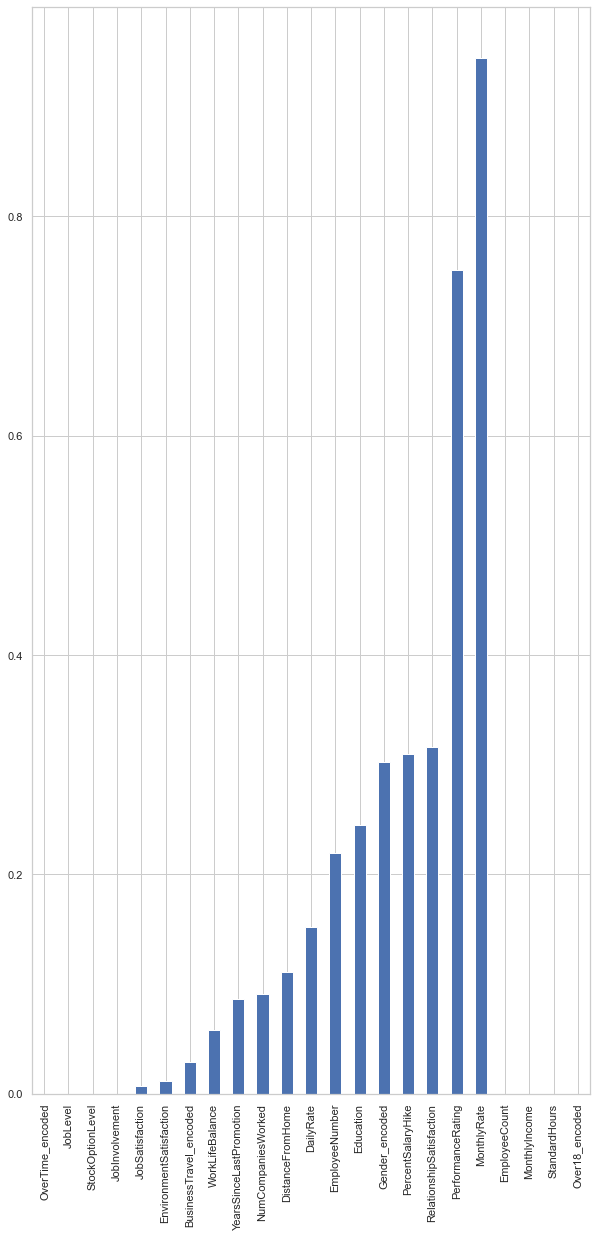

In [72]:
sel=f_classif(Xf_train, Y_train)
p_values=pd.Series(sel[1])
p_values.index=Xf_train.columns
p_values.sort_values(ascending=True, inplace=True)
p_values.plot.bar(figsize=(10,20))

# I have used these transformed values to generate pvalue of each feature (to explain label).

# Mathematical Notation

P Value = (sample proportion - Assumed population proportion in the null hypothesis)/(sqrt((Assumed population proportion in the null hypothesis * ( 1 - Assumed population proportion in the null hypothesis )) / n))

In [73]:
p_values=p_values[p_values<0.05]
p_values.index

Index(['OverTime_encoded', 'JobLevel', 'StockOptionLevel', 'JobInvolvement',
       'JobSatisfaction', 'EnvironmentSatisfaction', 'BusinessTravel_encoded'],
      dtype='object')

# These features strongly impact attrition and control actions are required mainly on these to curb the problems around attrition.

# P Values are an important component of feature selection, with significance level set to 0.05, Variance Threshold
    ensemble technique returns with 95% confidence, all the features that have maximum explanatory capacity
For the present dataset features with pvalues with less than 0.05 are:
Index(['OverTime_encoded', 'JobLevel', 'StockOptionLevel', 'JobInvolvement',
       'JobSatisfaction', 'EnvironmentSatisfaction', 'BusinessTravel_encoded], dtype='object')

In [74]:
import numpy as np
x=x_frame1.copy()
x=x[['OverTime_encoded', 'JobLevel', 'StockOptionLevel', 'JobInvolvement',
       'JobSatisfaction', 'EnvironmentSatisfaction', 'BusinessTravel_encoded']]
x.sample()

OverTime_encoded  JobLevel  StockOptionLevel  JobInvolvement  \
51               1.0       0.0               0.0        0.591733   

    JobSatisfaction  EnvironmentSatisfaction  BusinessTravel_encoded  
51         0.631895                 0.633045                     1.0

# The above table displays a sample of final x vector with features and values finally selected to be used for prediction.

In [75]:
y.sample()

873    0
Name: Attrition, dtype: int32

# The above series displays a sample of label.

In [76]:
x.shape, y.shape

((1470, 7), (1470,))

# The above cell displays final shapes of x and y vectors

In [77]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.6)

In [78]:
x_train.shape, y_train.shape

((588, 7), (588,))

# In the above two cells, I have divided final vectors with train test split technique, in which train data is 40% and test data is 60% to avoid overfitting issue.

# Model Development, Evaluation And Saving (Total Models = 10)

# Selection Reasoning Of Models 1 to 5

# The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

Examples: Bagging methods, Forests of randomized trees, etcetera

By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

Examples: AdaBoost, Gradient Tree Boosting,etcetera

# The use case assigned revolves around uneven label points hence there is high probality of not achieving a good fit. Hence, I have tried different ensembele techniques that can lower variance and bias and help achieve a goodness of fit. (Just as a reminder, I have already applied variance threshold of 0.01 to ensure that risk of models is low). 

# The theories in the two cells above explain why I have chosen Model 1, Model 2, Model 3, Model 4 and Model 5 for this use case. Model 5 is support vector classifier and hence, is again a very powerful implementation to prevent illness of fit and make appropriate decision boundaries.

# Model 1

# Random Forest Classifier With Intuitional Hyper Parameter Tuning

In [79]:
from sklearn.ensemble import RandomForestClassifier as el
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import pickle
rfc=el(200, criterion='entropy', random_state=100, max_features='sqrt', min_weight_fraction_leaf=0.1, min_impurity_decrease=0.01, n_jobs=-1, warm_start=True, max_depth=30, max_leaf_nodes=10, ccp_alpha=1, oob_score=True, bootstrap=True)
rfc.fit(x_train, y_train)
model1_train_score=rfc.score(x_train, y_train)
model1_test_score=rfc.score(x_test, y_test)
scores=cross_val_score(rfc, x, y, cv=5)
cv_scores=scores.mean()
cv_risk=scores.std()
y_pred=rfc.predict(x_train)
ytst_pred=rfc.predict(x_test)
model1_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred})
model1_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred})

In [80]:
model1_prediction_train

y_train  yhat
442         0     0
481         0     0
114         0     0
41          0     0
951         0     0
...       ...   ...
694         0     0
486         0     0
460         0     0
1078        0     0
31          0     0

[588 rows x 2 columns]

In [81]:
model1_prediction_test

y_test  yhat
1001       0     0
115        0     0
223        0     0
879        0     0
1392       0     0
...      ...   ...
1183       0     0
402        0     0
738        0     0
668        0     0
654        0     0

[882 rows x 2 columns]

In [82]:
# Model 1 Metrics

In [83]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(rfc.score(x_train, y_train),2))
print('Test Score: ', np.round(rfc.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test,ytst_pred),2))
print('Cross Validation Score: ', np.round(cv_scores,2))
print('Cross Validation Risk: ', np.round(cv_risk,2))
#Since risk is low model is low variance and since train score and test score are equivalent, model is low bias too.

Train Score:  0.82
Test Score:  0.85
Train Accuracy Score:  0.82
Test Accuracy Score:  0.85
Cross Validation Score:  0.84
Cross Validation Risk:  0.0


In [84]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,ytst_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       753
           1       0.00      0.00      0.00       129

    accuracy                           0.85       882
   macro avg       0.43      0.50      0.46       882
weighted avg       0.73      0.85      0.79       882



In [85]:
print(confusion_matrix(y_test,ytst_pred))

[[753   0]
 [129   0]]


In [86]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred), 2)
    print(auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

0.5


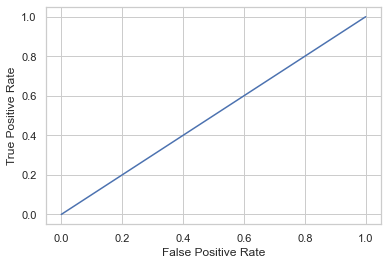

In [87]:
from sklearn import metrics
y_pred_proba =rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Model 2

# Random Forest Classifier With Default Hyper Parameter Tuning

In [88]:
from sklearn.ensemble import RandomForestClassifier as el
from sklearn.model_selection import cross_val_score
rfc1=el()
rfc1.fit(x_train, y_train)
model2_train_score=rfc1.score(x_train, y_train)
model2_test_score=rfc1.score(x_test, y_test)
scores1=cross_val_score(rfc1, x, y, cv=5)
cv_scores1=scores1.mean()
cv_risk1=scores1.std()
y_pred1=rfc1.predict(x_train)
ytst_pred1=rfc1.predict(x_test)
model2_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred1})
model2_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred1})

In [89]:
model2_prediction_train

y_train  yhat
442         0     0
481         0     0
114         0     0
41          0     0
951         0     0
...       ...   ...
694         0     0
486         0     0
460         0     0
1078        0     0
31          0     0

[588 rows x 2 columns]

In [90]:
model2_prediction_test

y_test  yhat
1001       0     0
115        0     0
223        0     0
879        0     0
1392       0     0
...      ...   ...
1183       0     0
402        0     0
738        0     0
668        0     0
654        0     0

[882 rows x 2 columns]

In [91]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(rfc1.score(x_train, y_train),2))
print('Test Score: ', np.round(rfc1.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred1),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred1),2))
print('Cross Validation Score: ', np.round(cv_scores1,2))
print('Cross Validation Risk: ', np.round(cv_risk1,2))

Train Score:  0.96
Test Score:  0.84
Train Accuracy Score:  0.96
Test Accuracy Score:  0.84
Cross Validation Score:  0.84
Cross Validation Risk:  0.01


In [92]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred1))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       753
           1       0.45      0.37      0.41       129

    accuracy                           0.84       882
   macro avg       0.67      0.65      0.66       882
weighted avg       0.83      0.84      0.84       882



In [93]:
print(confusion_matrix(y_test, ytst_pred1))

[[695  58]
 [ 81  48]]


In [94]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred1), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.65


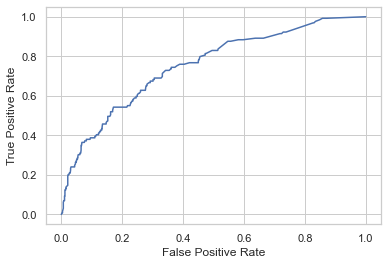

In [95]:
from sklearn import metrics
y_pred_proba =rfc1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model 3

# RFC With Grid Search CV

In [96]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
rfc2=el()
params = {
 'n_estimators': [50, 100],
 'max_features':['auto', 'sqrt', 'log2'],
 'criterion' : ['entropy', 'gini'],
 'bootstrap': [True, False],
 'oob_score':[True, False],
 'n_jobs':[None,-1],
 'warm_start':[True, False]
}
gridsearch=GridSearchCV(rfc2, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
best_parameters=gridsearch.best_params_
best_score=gridsearch.best_score_
best_estim=gridsearch.best_estimator_
best_estim.fit(x_train,y_train)
y_pred2=best_estim.predict(x_train)
model3_train_score=best_estim.score(x_train, y_train)
model3_test_score=best_estim.score(x_test, y_test)
ytst_pred2=best_estim.predict(x_test)
model3_save=pickle.dumps(best_estim)
model3_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred2})
model3_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred2})

In [97]:
# Model 3 Predictions

In [98]:
model3_prediction_train

y_train  yhat
442         0     0
481         0     0
114         0     0
41          0     0
951         0     0
...       ...   ...
694         0     0
486         0     0
460         0     0
1078        0     0
31          0     0

[588 rows x 2 columns]

In [99]:
model3_prediction_test

y_test  yhat
1001       0     0
115        0     0
223        0     0
879        0     0
1392       0     0
...      ...   ...
1183       0     0
402        0     0
738        0     0
668        0     0
654        0     0

[882 rows x 2 columns]

In [100]:
# Model 3 Metrics

In [101]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(best_estim.score(x_train, y_train),2))
print('Test Score: ', np.round(best_estim.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred2),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred2),2))

Train Score:  0.96
Test Score:  0.84
Train Accuracy Score:  0.96
Test Accuracy Score:  0.84


In [102]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50, 'n_jobs': -1, 'oob_score': False, 'warm_start': True}
0.835071707953064


In [103]:
best_estim=gridsearch.best_estimator_
print(best_estim)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=50, n_jobs=-1, warm_start=True)


In [104]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred2))

print(confusion_matrix(y_test, ytst_pred2))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       753
           1       0.45      0.37      0.41       129

    accuracy                           0.84       882
   macro avg       0.67      0.65      0.66       882
weighted avg       0.83      0.84      0.84       882

[[694  59]
 [ 81  48]]


In [105]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred2), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.65


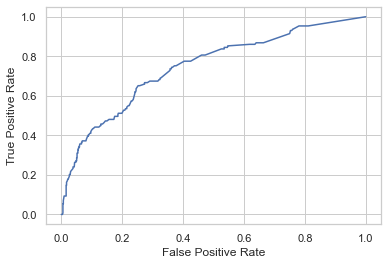

In [106]:
from sklearn import metrics
y_pred_proba =best_estim.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model 4

# Bagging Classifier With Grid Search CV Hyper Parameter Tuning

In [107]:
import sklearn
abreg1 = sklearn.ensemble.BaggingClassifier()
params = {
 'n_estimators': [50, 100],
 'bootstrap': [True, False],
 'random_state': [0,10,100,1000,10000,100000,100000],
 'oob_score': [True, False]
 }
gridsearch1=GridSearchCV(abreg1, params, cv=5, return_train_score=True)
gridsearch1.fit(x_train, y_train)
best_parameters1=gridsearch1.best_params_
best_score1=gridsearch1.best_score_
best_estim1=gridsearch1.best_estimator_
best_estim1.fit(x_train,y_train)
y_pred3=best_estim1.predict(x_train)
model4_train_score=best_estim1.score(x_train, y_train)
model4_test_score=best_estim1.score(x_test, y_test)
ytst_pred3=best_estim1.predict(x_test)
model4_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred3})
model4_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred3})

In [108]:
# Model 4 Predictions

In [109]:
model4_prediction_train

y_train  yhat
442         0     0
481         0     0
114         0     0
41          0     0
951         0     0
...       ...   ...
694         0     0
486         0     0
460         0     0
1078        0     0
31          0     0

[588 rows x 2 columns]

In [110]:
model4_prediction_test

y_test  yhat
1001       0     0
115        0     0
223        0     0
879        0     0
1392       0     0
...      ...   ...
1183       0     0
402        0     0
738        0     0
668        0     0
654        0     0

[882 rows x 2 columns]

In [111]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(best_estim1.score(x_train, y_train),2))
print('Test Score: ', np.round(best_estim1.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred3),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred3),2))

Train Score:  0.96
Test Score:  0.83
Train Accuracy Score:  0.96
Test Accuracy Score:  0.83


In [112]:
print(gridsearch1.best_params_)
print(gridsearch1.best_score_)

{'bootstrap': True, 'n_estimators': 50, 'oob_score': True, 'random_state': 0}
0.821454440098508


In [113]:
best_estim=gridsearch1.best_estimator_
print(best_estim)

BaggingClassifier(n_estimators=50, oob_score=True, random_state=0)


In [114]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred3))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       753
           1       0.42      0.41      0.42       129

    accuracy                           0.83       882
   macro avg       0.66      0.66      0.66       882
weighted avg       0.83      0.83      0.83       882



In [115]:
print(confusion_matrix(y_test, ytst_pred3))

[[681  72]
 [ 76  53]]


In [116]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred3), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.66


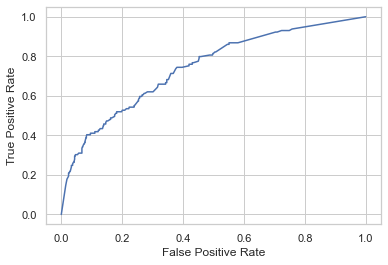

In [117]:
from sklearn import metrics
y_pred_proba =best_estim1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model5

# Decision Tree Regressor With Default Hyper Parameter Tuning

In [118]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
model5_prediction=clf.fit(x_train, y_train)
cross_scores=clf.score(x_train, y_train)
cross_risk=clf.score(x_test, y_test)

In [119]:
y_pred5=pd.DataFrame(clf.predict(x_train), columns=['yhat'])
print('Train Prediction\n')
y_pred5

Train Prediction



yhat
0       0
1       0
2       0
3       0
4       0
..    ...
583     0
584     1
585     0
586     0
587     1

[588 rows x 1 columns]

In [120]:
ytst_pred5=pd.DataFrame(clf.predict(x_test), columns=['yhat'])
print('Test Prediction\n')
ytst_pred5

Test Prediction



yhat
0       0
1       0
2       0
3       1
4       1
..    ...
877     0
878     0
879     1
880     0
881     0

[882 rows x 1 columns]

In [121]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(clf.score(x_train, y_train),2))
print('Test Score: ', np.round(clf.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred5),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred5),2))
print('Cross Validation Score: ', np.round(cv_scores,2))
print('Cross Validation Risk: ', np.round(cv_risk,2))

Train Score:  0.71
Test Score:  0.73
Train Accuracy Score:  0.71
Test Accuracy Score:  0.73
Cross Validation Score:  0.84
Cross Validation Risk:  0.0


In [122]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred5))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       753
           1       0.11      0.12      0.11       129

    accuracy                           0.73       882
   macro avg       0.48      0.48      0.48       882
weighted avg       0.74      0.73      0.73       882



In [123]:
print(confusion_matrix(y_test, ytst_pred5))

[[629 124]
 [114  15]]


In [124]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred5), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.48


In [125]:
from sklearn import metrics
try:
    y_pred_proba =clf.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
except AttributeError:
    print('Graph cannot be generated because probability is off for model development.')

Graph cannot be generated because probability is off for model development.


# Resampling, Rescaling And Re Feature Selection And Re Spliting For Model Optimization

# Reasoning Of Applying Resampling and developing models 6 to 10.

# The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
Two families of ensemble methods are usually distinguished:

In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

Examples: Bagging methods, Forests of randomized trees, etcetera

By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

Examples: AdaBoost, Gradient Tree Boosting,etcetera

# Since, original y vector is highly unsampled, I will do resampling to balance both 1 and 0 data points to ensure that alongwith being low on variance, the model is also low on bias. Hence, I I can achieve, bias variance trade off.

# Hence, I have developed models 6 to 10 based on rfc, ensemble and svm methods on resampled data

In [126]:
y.value_counts() #original y vector, value counts

0    1233
1     237
Name: Attrition, dtype: int64

0    1105
1    1105
Name: Attrition, dtype: int64


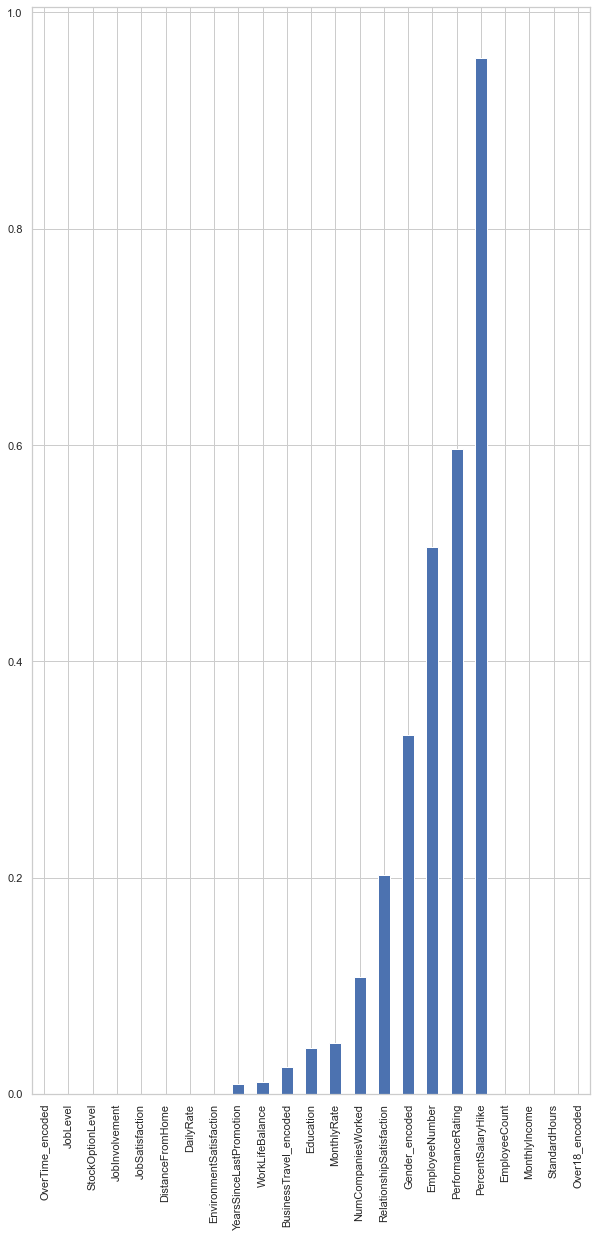

In [128]:
import numpy as np
from sklearn.utils import resample
x=x_frame11.copy()
y=final_dataframe['Attrition']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
X=pd.concat([x_train, y_train], axis=1)
not_good=X[X['Attrition']==0]
good=X[X['Attrition']==1]
good_upsampled=resample(good, replace=True, n_samples=len(not_good), random_state=0)
upsampled=pd.concat([not_good, good_upsampled])
x=upsampled.drop('Attrition', axis=1)
y=upsampled['Attrition']
Xf_train, Xf_test, Y_train, Y_test=train_test_split(x,y,test_size=0.1)
print(upsampled['Attrition'].value_counts())
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(Xf_train)
Xf_train_filter=constant_filter.transform(Xf_train)
Xf_test_filter=constant_filter.transform(Xf_test)
sel=f_classif(Xf_train, Y_train)
p_values=pd.Series(sel[1])
p_values.index=Xf_train.columns
p_values.sort_values(ascending=True, inplace=True)
p_values.plot.bar(figsize=(10,20))
p_values=p_values[p_values<0.05]
p_values=pd.DataFrame(p_values, columns=['P Values'])
p_values['Features']=p_values.index
p_values=p_values[['Features', 'P Values']]
x=x[p_values['Features']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

# The above matrix represent balanced label vector with 1105 data points for 0 and 1105 data points for 1. And the graph shoows new set of strong indicators based on p values, with variance threshold as low as 0.01 and comfidence as 95%.

In [129]:
p_values

Features      P Values
OverTime_encoded                OverTime_encoded  1.232190e-40
JobLevel                                JobLevel  5.163186e-33
StockOptionLevel                StockOptionLevel  1.789168e-24
JobInvolvement                    JobInvolvement  4.345035e-13
JobSatisfaction                  JobSatisfaction  5.802648e-10
DistanceFromHome                DistanceFromHome  1.472031e-07
DailyRate                              DailyRate  4.196763e-06
EnvironmentSatisfaction  EnvironmentSatisfaction  9.206404e-05
YearsSinceLastPromotion  YearsSinceLastPromotion  8.814030e-03
WorkLifeBalance                  WorkLifeBalance  1.125088e-02
BusinessTravel_encoded    BusinessTravel_encoded  2.514269e-02
Education                              Education  4.218656e-02
MonthlyRate                          MonthlyRate  4.697749e-02

# Model 6

# RFC On Resampled Data With Intuitional Hyper Parameter Tuning

In [130]:
from sklearn.ensemble import RandomForestClassifier as el
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import pickle
rfc=el(200, criterion='entropy', random_state=100, max_features='sqrt', min_weight_fraction_leaf=0.1, min_impurity_decrease=0.01, n_jobs=-1, warm_start=True, max_depth=30, max_leaf_nodes=10, ccp_alpha=1, oob_score=True, bootstrap=True)
rfc.fit(x_train, y_train)
model1_train_score=rfc.score(x_train, y_train)
model1_test_score=rfc.score(x_test, y_test)
scores=cross_val_score(rfc, x, y, cv=5)
cv_scores=scores.mean()
cv_risk=scores.std()
y_pred=rfc.predict(x_train)
ytst_pred=rfc.predict(x_test)
model1_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred})
model1_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred})

In [131]:
model1_prediction_train

y_train  yhat
1443        0     0
914         0     0
107         1     0
1110        1     0
940         1     0
...       ...   ...
1045        0     0
1385        0     0
1079        0     0
467         0     0
1049        0     0

[1989 rows x 2 columns]

In [132]:
model1_prediction_test

y_test  yhat
985        1     0
216        1     0
386        0     0
1259       0     0
749        1     0
...      ...   ...
982        0     0
480        1     0
489        0     0
1006       1     0
1347       0     0

[221 rows x 2 columns]

In [133]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(rfc.score(x_train, y_train),2))
print('Test Score: ', np.round(rfc.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred),2))
print('Cross Validation Score: ', np.round(cv_scores,2))
print('Cross Validation Risk: ', np.round(cv_risk,2))

Train Score:  0.5
Test Score:  0.5
Train Accuracy Score:  0.5
Test Accuracy Score:  0.5
Cross Validation Score:  0.5
Cross Validation Risk:  0.0


In [134]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred))
print(confusion_matrix(y_test, ytst_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       111
           1       0.00      0.00      0.00       110

    accuracy                           0.50       221
   macro avg       0.25      0.50      0.33       221
weighted avg       0.25      0.50      0.34       221

[[111   0]
 [110   0]]


In [135]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.5


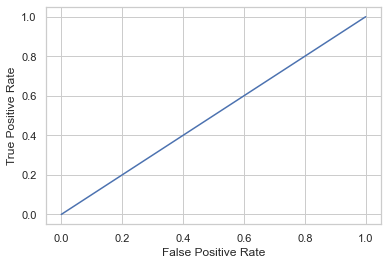

In [136]:
from sklearn import metrics
y_pred_proba =rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model 7

# RFC On Resampled Data With Default Hyper Parameter Tuning

In [137]:
from sklearn.ensemble import RandomForestClassifier as el
from sklearn.model_selection import cross_val_score
rfc1=el()
rfc1.fit(x_train, y_train)
model2_train_score=rfc1.score(x_train, y_train)
model2_test_score=rfc1.score(x_test, y_test)
scores1=cross_val_score(rfc1, x, y, cv=5)
cv_scores1=scores1.mean()
cv_risk1=scores1.std()
y_pred1=rfc1.predict(x_train)
ytst_pred1=rfc1.predict(x_test)
model2_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred1})
model2_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred1})

In [138]:
y_pred1

array([0, 0, 1, ..., 0, 0, 0])

In [139]:
ytst_pred1

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0])

In [140]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(rfc1.score(x_train, y_train),2))
print('Test Score: ', np.round(rfc1.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred1),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred1),2))
print('Cross Validation Score: ', np.round(cv_scores1,2))
print('Cross Validation Risk: ', np.round(cv_risk1,2))

Train Score:  1.0
Test Score:  0.97
Train Accuracy Score:  1.0
Test Accuracy Score:  0.97
Cross Validation Score:  0.97
Cross Validation Risk:  0.0


In [141]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred1), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.97


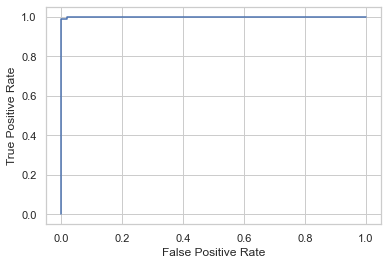

In [142]:
from sklearn import metrics
y_pred_proba =rfc1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model8

# RFC With Grid Search CV On Resampled Data

In [144]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
rfc2=el()
params = {
 'n_estimators': [50, 100],
 'max_features':['auto', 'sqrt', 'log2'],
 'criterion' : ['entropy', 'gini'],
 'bootstrap': [True, False],
 'oob_score':[True, False],
 'n_jobs':[None,-1],
 'warm_start':[True, False]
}
gridsearch=GridSearchCV(rfc2, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
best_parameters=gridsearch.best_params_
best_score=gridsearch.best_score_
best_estim=gridsearch.best_estimator_
best_estim.fit(x_train,y_train)
y_pred2=best_estim.predict(x_train)
model3_train_score=best_estim.score(x_train, y_train)
model3_test_score=best_estim.score(x_test, y_test)
ytst_pred2=best_estim.predict(x_test)
model3_save=pickle.dumps(best_estim)
model3_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred2}) # Model 8 train prediction
model3_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred2}) # Model 8 test prediction

In [145]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(best_estim.score(x_train, y_train),2))
print('Test Score: ', np.round(best_estim.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred2),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred2),2))

Train Score:  1.0
Test Score:  0.99
Train Accuracy Score:  1.0
Test Accuracy Score:  0.99


In [146]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'warm_start': True}
0.9718453729605205


In [147]:
best_estim=gridsearch.best_estimator_
print(best_estim)

RandomForestClassifier(bootstrap=False, n_estimators=50, warm_start=True)


In [148]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred2))

print(confusion_matrix(y_test, ytst_pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       111
           1       0.97      1.00      0.99       110

    accuracy                           0.99       221
   macro avg       0.99      0.99      0.99       221
weighted avg       0.99      0.99      0.99       221

[[108   3]
 [  0 110]]


In [149]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred2), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.99


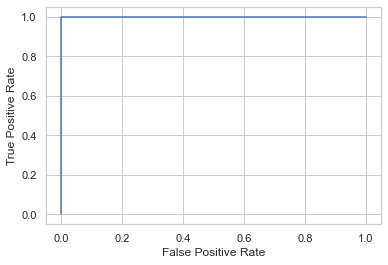

In [151]:
from sklearn import metrics
y_pred_proba =best_estim.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [152]:
best_model1=pickle.dumps(best_estim) #saving the model

# Model 9

# Bagging Classifier With Grid Searh CV Hyper Parameter Tuning On Resampled Data

In [153]:
import sklearn
abreg1 = sklearn.ensemble.BaggingClassifier()
params = {
 'n_estimators': [50, 100],
 'bootstrap': [True, False],
 'random_state': [0,10,100,1000,10000,100000,100000],
 'oob_score': [True, False]
 }
gridsearch1=GridSearchCV(abreg1, params, cv=5, return_train_score=True)
gridsearch1.fit(x_train, y_train)
best_parameters1=gridsearch1.best_params_
best_score1=gridsearch1.best_score_
best_estim1=gridsearch1.best_estimator_
best_estim1.fit(x_train,y_train)
y_pred3=best_estim1.predict(x_train)
model4_train_score=best_estim1.score(x_train, y_train)
model4_test_score=best_estim1.score(x_test, y_test)
ytst_pred3=best_estim1.predict(x_test)
model4_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred3})
model4_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred3})

In [154]:
model4_prediction_train

y_train  yhat
1443        0     0
914         0     0
107         1     1
1110        1     1
940         1     1
...       ...   ...
1045        0     0
1385        0     0
1079        0     0
467         0     0
1049        0     0

[1989 rows x 2 columns]

In [155]:
model4_prediction_test

y_test  yhat
985        1     1
216        1     1
386        0     0
1259       0     0
749        1     1
...      ...   ...
982        0     0
480        1     1
489        0     0
1006       1     1
1347       0     0

[221 rows x 2 columns]

In [156]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(best_estim1.score(x_train, y_train),2))
print('Test Score: ', np.round(best_estim1.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train, y_pred3),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test, ytst_pred3),2))

Train Score:  1.0
Test Score:  0.95
Train Accuracy Score:  1.0
Test Accuracy Score:  0.95


In [157]:
print(gridsearch1.best_params_)
print(gridsearch1.best_score_)

{'bootstrap': True, 'n_estimators': 50, 'oob_score': True, 'random_state': 100}
0.9426882523448477


In [158]:
best_estim=gridsearch1.best_estimator_
print(best_estim)

BaggingClassifier(n_estimators=50, oob_score=True, random_state=100)


In [159]:
from sklearn .metrics import roc_auc_score
try:
    auc = np.round(roc_auc_score(y_test, ytst_pred3), 2)
    print('auc: ',auc)
except ValueError:
    print('Data Is Imbalanced, ROC AUC Curve Cannot Be Generated.')

auc:  0.95


In [160]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, ytst_pred3))
print(confusion_matrix(y_test, ytst_pred3))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       111
           1       0.92      0.99      0.96       110

    accuracy                           0.95       221
   macro avg       0.96      0.95      0.95       221
weighted avg       0.96      0.95      0.95       221

[[102   9]
 [  1 109]]


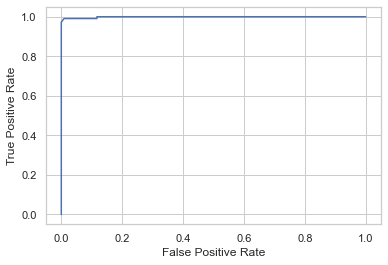

In [161]:
from sklearn import metrics
y_pred_proba =best_estim1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model 10

# Support Vector Classifier with sigmoid to prevent overfitting on resampled data

In [162]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
model5_prediction=clf.fit(x_train, y_train)
cross_scores=clf.score(x_train, y_train)
cross_risk=clf.score(x_test, y_test)

In [163]:
y_pred5=clf.predict(x_train)
y_pred5

array([1, 1, 1, ..., 0, 1, 0])

In [164]:
ytst_pred5=clf.predict(x_test)
ytst_pred5

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1])

In [165]:
from sklearn.metrics import accuracy_score
print('Train Score: ', np.round(clf.score(x_train, y_train),2))
print('Test Score: ', np.round(clf.score(x_test, y_test),2))
print('Train Accuracy Score: ', np.round(accuracy_score(y_train,y_pred5),2))
print('Test Accuracy Score: ', np.round(accuracy_score(y_test,ytst_pred5),2))
print('Cross Validation Score: ', np.round(cv_scores,2))
print('Cross Validation Risk: ', np.round(cv_risk,2))

Train Score:  0.62
Test Score:  0.63
Train Accuracy Score:  0.62
Test Accuracy Score:  0.63
Cross Validation Score:  0.5
Cross Validation Risk:  0.0


In [166]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,ytst_pred5))
print(confusion_matrix(y_test,ytst_pred5))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       111
           1       0.64      0.59      0.62       110

    accuracy                           0.63       221
   macro avg       0.63      0.63      0.63       221
weighted avg       0.63      0.63      0.63       221

[[75 36]
 [45 65]]


In [167]:
from sklearn import metrics
try:
    y_pred_proba =clf.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
except AttributeError:
    print('Graph cannot be generated because probability is turned off for model development.')

Graph cannot be generated because probability is turned off for model development.


# Successful Model is saved in pickle for production

# Conclusion
There is 1 successful mode with right fit The model daisplays Low Variance And Low Biance with good accuracy scores.

Model 8: RFC With Grid Search CV On Resampled Data

Train Score:  1.0

Test Score:  0.99

Train Accuracy Score:  1.0

Test Accuracy Score:  0.99

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       111
           1       0.97      1.00      0.99       110

    accuracy                           0.99       221
   macro avg       0.99      0.99      0.99       221
weighted avg       0.99      0.99      0.99       221

[[108   3]
 [  0 110]]
 
 Please note, metrics calculation is explained above while development and evaluation.

# Credits:
DataTrained and Python Documentations.